# Power Outages - what characteristics are associated with public appeal and intentional attack outages?

## Summary of Findings

### Introduction
This project uses data from [this](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks) public dataset from Purdue University that documents major power outages witnessed within U.S. States withn the time period January 2000 - July 2016. Major power outages refer to those that impacted more than 50,000 customers or caused an unplanned load loss of 300 MW as defined by the Department of Energy. The dataset also contains geographic data, regional climate data, and land-use characteristics. A summary of the data contained within can be found [here](https://www.sciencedirect.com/science/article/pii/S2352340918307182).

Power outages are not all created equal. With various factors such as hardware, weather, and people involved, power outages vary in duration and consequence. Some may only effect a neighborhood, while others can cripple entire populations. Intrigued by some of the potential explanations for the variability in power outages, we decided to investigate the topic by exploring the question "what characteristics are associated with public appeal and intentional attack outages?" We chose to investigate these 2 cause categories in particular because they are both peculiar in that they appear to involve human intervention of various forms. Characteristics is a very broad term, meaning that we have to explore the nuances of this question which entails considering various factors of power outage causes such as their location, magnitude of effect, and temperment locality (season, anomaly level, climate category). The depth and domain explored varies for each cause, as metrics that are pertinent to some may not be relevant to others.

To address our question, we employ the aforementioned dataset of power outages that contain location data (columns: 'u.s._state', 'climate.region'), outage data (columns: 'state', 'year', 'start', 'end'), outage magnitude data ('outage.duration', 'demand.loss.mw', 'customers.affected'), local temperature data ('season', 'anomaly.level', 'climate.category'). Note that some columns are derived from other data from the dataset, the process of which will be discussed in the next section. These features allow us to identify specific causes and inspect their anatomy as defined previously. It allows us to ask questions such as, when does cause category x occur most frequently within each year? Why did category x appear more often in this specific year? Are there particular regions that experience more category x outages than others, if so, why? How devastating are the different causes? Careful consideration of the existing data should allow us to address a variety of questions regarding the outage categories.


### Cleaning and EDA

We posit that the data appears to be generated both computationally and hand entered. We believe a large portion to be computer processed due to the uniformity of the data in terms of certain columns such as the 'start' and 'end' as well as 'u.s._states' or 'climate.region'. There were no obvious human errors in these columns as there was a lack of manual nans such as using '-' as a categorical placeholder or -9999 as a numerical placeholder. However, in some other columns there were clerical mistakes that hint towards human input. For example, in 'cause.category.detail', categories that detailed the same specific cause had some variable forms such as the perplexing existence of both 'coal' and ' coal'(with a space in front of it) that clearly mean the same thing, but were entered inconsistently. Some data columns also seem unlikely to be able to be computer generated. For example, The data generating process for 'cause.category.detail' seems to fit more along the lines of a human clerk picking from multiple choice dropdown than computer generation.

The first step of our cleaning started with loading in the data. Since the data comes from an excel spreadsheet, we ignored the first 5 rows and 2 columns, which contained only meta-data that is relevant to the comprehensibility of a spreadsheet, but is irrelevant to a DataFrame. This step also includes dropping the first row which contained unit descriptions and the columns 'variables', which in the context of excel, demarcates the columns of the data and 'obs' which was just a numerical index. After loading in the data, we refactored some information to more accurately represent the meaning of the column. For example, we casted month from a numerical representation to a nominal one because in the context of the dataset, months is more accurately described as a categorical variable, rather than a numerical one as we cannot logically order them in any particular way (i.e. month is not an ordinal variable). We also reprocessed the columns that indicate start/end day and start/end time into a single uniform datetime object to clearly demarcate the point of occurrence. Besides this, we verified the integrity of our data by checking the types of each column and ensuring they are appropriate for the data type (for example, years are representd as integers instead of strings or floats).

During our exploration, we decided not to filter for certain anomalous values that we encountered such as having a duration of 0. At first glance, such values are nonsensical because a power outage that lasted for 0 minutes is not a power outage at all, but we reasoned that there could be 2 explanations for such values. Firstly, power outages that lasted 0 minutes may have simply been a data collection discrepency in the sense that the outage lasted for less than a minute. The granularity of the time data is not specific enough to facilitate seconds, meaning that recorded time is most likely rounded to the nearest minute. That means that although it's an anomalous entry, these data points of duration 0 are still meaningful. Another possibly explanation is that the outage durations of 0 are tied to specific categories of power outages, which we explore later on.

Our EDA explored the two cause categories of interest: public appeal and intentional attack. We included barplots, scatterplots, geoplots, and aggregates to support our analysis. We had theories for the justification of the anomalous activity of both categories, but only the theories regarding public appeal yielded meaningful results. In regards to public appeal, we theorize that this category refers to engineered regulated power outages that are intentionally induced at regular intervals to protect the integrity of the power grid in anticipation of extreme weather. This is otherwise known as Rotating outages. Our analysis provided strong support for this idea as public appeal occured only during specific seasons (summer, winter) and took place in states with justifiable grounds to do so (i.e. regions subject to extreme weather). In regards to exploring intentional attack, our ideas were proven false at many steps by our initial exploration, or we were left with no answer to provide. For example, in 2011, Washington witnessed almost 30 intentional attacks that resulted in power outages, but we could not find any justification for why this is the case. Nor could we explain why before 2011, intentional attack outages were astronomically rare. More detailed analysis can be found below.


### Assessment of Missingness
Our dataset had many columns with missing values. However, we ignored columns with less than 25 missing values, especially those not used within our analyses as their missingness is not as relevant to us. Overall, we determined that the columns 'cause.category.detail' and 'hurricane.names' are both Missing by Design, meaning that their missingness was purposeful. For example, if a hurricane name was missing, then we can conclude that there was no hurricane during the power outage. We then focused on determining whether the columns 'demand.loss', 'customers.affected', and 'end' were Missing at Random (MAR) or Missing Completely at Random (MCAR).

To do this, we ran permutation tests on the relavant columns using the Kolmogorov–Smirnov test statistic and a significance level 0.05. We chose to set a significance level of 0.05 to follow common standards. We felt that a tighter bound (ex. p-value = 0.01) is not necessary as our dataset is not as consequential as others.

**H<sub>0</sub> :** The distribution of our missing and non-missing data come from the same distribution; the missingness is MCAR.

**H<sub>A</sub> :** The distribution of our missing and non-missing data do not come from the same distribution; the missingness is MAR.

For the column 'end', we were curious to see if outages that occured in the beginning and ending years of the data collection period were more likely to be missing. Through the permutation test we determined that it was missing at random and dependant on year, with a p-value of  0.00000002391. This tells us that we are more likely to see missing values in end for outages that occured in certain years compared to others.
 
Once again for the column 'end', we were curious to see if it was dependant on any other columns aside from year, so we tested its missingness dependency on the column 'u.s._states'. Through the permutation test we determined that 'end' was not dependent on 'u.s._states', with a p-value of 0.281278. While this tells us that there is no clear correlation of missingness in 'end' and 'u.s._states', we cannot fully conclude our initial proposition that 'end' is only dependant on 'year'.

For the missingness of column 'demand.loss', we hypothesized that areas with higher 'popden.rural' values would have more instances of missing values for 'demand.loss'. Through the permutation test we determined that 'demand.loss' was missing at random and dependant on 'popden.rural', with a p-value of 0.000000000000000444. This tells us that we are more likely to see missing values in 'demand.loss' for certain values of 'popden.rural', but doesn't tell us exactly that it is correlated with more rural areas.

For The column 'customers.affected', we believed that there may be an association between the outage area's population size and missing values. Through the permutation test we determined that 'customers.affected' was missing at random and dependant on population size, with a p-value of 0.0000000000118. This tells us that we are more likely to see missing values in 'customers.affected/ for certain population sizes, but doesn't tell us exactly that it is correlated with smaller populations.

The conclusions we drew from our missingness tests, particularly those discerning between MAR and MCAR, are not fully comprehensive, since many of them do not include other columns certain missingness data could be dependent on. However, since most of the data containing substantial missingness were not heavily used in our analysis, they should not impact our results too much or at all. 


### Hypothesis Test

For our hypothesis test we chose two hypotheses to explore. 

The first one is "do outages that result from intentional attacks cause shorter outage durations compared to other cause categories?" This was because we noticed in our EDA that although intentional attacks were the second most common category of power outage causes. We also noticed that it contained some durations of 0 which likely indicated that the outage lasted for less than a minute. This piqued our interest to investigate whether the outage duration for intentional attacks were statistically different from the outage duration of other categories. We conducted a permutation test with significance level of 0.05 with:

H<sub>0</sub>: In the population, the outage duration for outages resulting from intentional attack and outage duration for outages resulting from other causes have the same distribution. The observed difference was due to random chance.


H<sub>A</sub>: Intentional attack outages result in shorter outages on average.

Our resulting p-value was 0.0, leading to us rejecting the null hypothesis in favor of the alternative. We concluded that intentional attacks do result in short outage duration.

For the second question, we chose to explore "are public appeal outages man-made outages?" This question was more challenging to address as it's difficult to quantify man-made versus a natural cause for an outage. We argue that one distinct quality of man-made outages would be the "consistency" in their outage duration. This "consistency" is measured within our data by the variance of outage duration, so we decided to perform a hypothesis test using variance ratio as the test statistic. This test is conducted with a significance level of 0.05 with:

H<sub>0</sub>: In the population, the variance for outage duration resulting from public appeal outages and the variance for outage duration resulting from other causes have the same distribution. The observed difference was due to random chance.

H<sub>A</sub>: Public appeal outage durations have less variance as outage durations from other cause categories.

Our resulting p-value was 0.0006, leading to us rejecting the null hypothesis in favor of the alternative. We concluded that the variance of outage durations from public appeal outages are lower. This supported our theory that public appeal outages are man made because the statistically significant lower variance indicates some human interference.

A limitation with our hypotheses was that our sample size for both were relatively small. The conclusions drawn from these tests are meant to act as evidence that's part of the collective analysis supporting our theory regarding outages resulting from public appeal and outages resulting from intentional attacks. As standalong evidence, they are not meant to be fully self sufficient, they are part of a greater collection.

## Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import folium
import geopandas as gpd
import calendar
from folium.features import GeoJsonTooltip
from scipy.stats import ks_2samp
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

# Cleaning and EDA

Our first step is to read in our data from the excel sheet. Using argument passing, we skip by empty cells in the excel that are meant for formatting. We then dropped the first row that indicated units of each category and the columns that were irrelevant (obs is a numerical index and variables indicates in excel the columns of the table).

In [2]:
outages = (pd.read_excel(os.path.join('data','outage.xlsx'), skiprows = 5).drop(0).drop(columns = ['variables', 'OBS']))

In [3]:
# Dataframe comes out correctly // no erroneous row or columns
outages.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
1,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,2011-07-01 00:00:00,17:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
2,2014.0,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2014-05-11 00:00:00,18:38:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
3,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,2010-10-26 00:00:00,20:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
4,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2012-06-19 00:00:00,04:30:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
5,2015.0,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,2015-07-18 00:00:00,02:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743


### Cleaning
In order to make our data more usable, some data cleaning and refactoring was required. The original dataframe that's read in from the excel had 2 separate columns to indicate when power outages occurred and ended - the start/restoration date, which only included the year-month-day, and the start/restoration time, which only included the hour:minute:second that it started/ended. These columns were respectively condensed into a single column 'start'/'end' which indicated in a single pd.datetime object the aforementioned information. On top of this, certain time data columns were reformatted to appropriately indicate their use. Month and year were both translated from a numerical representation to a categorical one (i.e. from number to name). Though they can be represented as numbers, in the context of our analysis they are used as categorical variables to deliniate power outages that occur at different time periods, thus making it more appropriate for them to be nominally represented. 

Out of interest for some possible questions, we decided to generate 2 new columns of data: 'SEASON' and 'QUARTILE'. The season of a power outage was derived from the month that it occurred in according to the [Meteorological definition](https://www.timeanddate.com/calendar/aboutseasons.html). By this definition, Spring spans March through May, Summer spans June through August, Autumn spans September through November, and Winter spans December through February. Seasons generally indicate specific weather patterns and operate as a slightly more abstracted layer of data that we can use as a broader category when considering power outages. The second column we generated was 'QUARTILE' which classifies each row of data into a quartile [1,4] based on its outage duration. This is later used for our hypothesis testing section.

In [4]:
def format_time(df):
    """
    function to reformat time input for start and restoration date into a datetime structure. 
    Also refactors Months into names instead of numerical representation and years into integers.
    Also adds a season column based on the month of the outage.

    input:
        df(pd.df): dataframe to perform operations on.

    returns:
        copy of dataframe where the used columns are dropped, new columns 'START' and 'END' are 
        inputted in their place, month data and years is refactored, and seasons are added.
    """
    seasons_dict = {'Jan':'winter','Feb':'winter','Mar':'spring','Apr':'spring','May':'spring','Jun':'summer','Jul':'summer','Aug':'summer','Sep':'autumn','Oct':'autumn','Nov':'autumn','Dec': 'winter'}
    outages = df.copy()
    #reformatting time data
    outages['START'] = pd.to_datetime(outages['OUTAGE.START.DATE'].astype(str).str[:-8] + outages['OUTAGE.START.TIME'].astype(str))
    outages['END'] = (pd.to_datetime(outages['OUTAGE.RESTORATION.DATE'].astype(str).str[:-8] + outages['OUTAGE.RESTORATION.TIME'].astype(str)))
    
    #drop used columns
    outages = outages.drop(columns = ['OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME'])
    #reformat month from int to str
    outages['MONTH'] = (pd.DataFrame(outages['MONTH']).applymap(lambda x: calendar.month_abbr[int(x)], na_action = 'ignore'))
    #cast year values to int
    outages['YEAR'] = outages['YEAR'].astype(int)
    #create seasons data
    outages['SEASON'] = outages['MONTH'].replace(seasons_dict)
    return outages
    
outages_time = format_time(outages)

In [5]:
outages_time.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,...,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,START,END,SEASON
1,2011,Jul,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,NaN,...,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2011-07-01 17:00:00,2011-07-03 20:00:00,summer
2,2014,May,Minnesota,MN,MRO,East North Central,-0.1,normal,intentional attack,vandalism,...,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2014-05-11 18:38:00,2014-05-11 18:39:00,spring
3,2010,Oct,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,heavy wind,...,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2010-10-26 20:00:00,2010-10-28 22:00:00,autumn
4,2012,Jun,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,thunderstorm,...,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2012-06-19 04:30:00,2012-06-20 23:00:00,summer
5,2015,Jul,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,NaN,...,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2015-07-18 02:00:00,2015-07-19 07:00:00,summer


During our exploration, we discovered that certain columns containing string data had clerical errors such as leading and trailing white spaces as well as inconsistent character case. In order to account for this, we converted the contents of all string data columns into lower case and applied .strip() to remove unexpected white spaces. After these operations, the string data types should be consistent. We also converted column names to lower case for ease of query. 

In [6]:
def clean_strs(df):
    """
    function to reformat string data. Relevant strings are stripped and lower-cased.

    input:
        df(pd.df): dataframe to perform operations on.

    returns:
        copy of dataframe where string data is reformatted and column names are lowered.
    """
    outages = df.copy()
    outages.columns = outages.columns.str.lower()
    outages[outages.convert_dtypes().select_dtypes('string').columns] = (outages[outages.convert_dtypes().select_dtypes('string').columns].applymap(str.lower, na_action = 'ignore'))
    outages[outages.convert_dtypes().select_dtypes('string').columns] = (outages[outages.convert_dtypes().select_dtypes('string').columns].applymap(str.strip, na_action = 'ignore'))
    return outages
outages_clean = clean_strs(outages_time)

In [7]:
outages_clean.head()

,year,month,u.s._state,postal.code,nerc.region,climate.region,anomaly.level,climate.category,cause.category,cause.category.detail,...,popden_uc,popden_rural,areapct_urban,areapct_uc,pct_land,pct_water_tot,pct_water_inland,start,end,season
1,2011,jul,minnesota,mn,mro,east north central,-0.3,normal,severe weather,NaN,...,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2011-07-01 17:00:00,2011-07-03 20:00:00,summer
2,2014,may,minnesota,mn,mro,east north central,-0.1,normal,intentional attack,vandalism,...,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2014-05-11 18:38:00,2014-05-11 18:39:00,spring
3,2010,oct,minnesota,mn,mro,east north central,-1.5,cold,severe weather,heavy wind,...,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2010-10-26 20:00:00,2010-10-28 22:00:00,autumn
4,2012,jun,minnesota,mn,mro,east north central,-0.1,normal,severe weather,thunderstorm,...,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2012-06-19 04:30:00,2012-06-20 23:00:00,summer
5,2015,jul,minnesota,mn,mro,east north central,1.2,warm,severe weather,NaN,...,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2015-07-18 02:00:00,2015-07-19 07:00:00,summer


As can be seen from the example below with coal, the post cleaning result meant that previously incorrectly entered data is now aggregated correctly. 'Coal' and ' Coal' were normalized to 'coal', which is indicated by their value counts. Before cleaning, there were 8 'Coal' and 10 ' Coal', and after there were 18 'coal'.

In [8]:
#'Coal' vs ' Coal' pre cleaning
temp = (pd.DataFrame(outages_time.groupby('CAUSE.CATEGORY.DETAIL')['YEAR'].count()))
print("The presence of 'Coal' pre-cleaning was: "+ str(temp.loc['Coal']['YEAR']))
print("The presence of ' Coal' pre-cleaning was: " + str(temp.loc[' Coal']['YEAR']))

# 'Coal' vs ' Coal' post cleaning
temp = (pd.DataFrame(outages_clean.groupby('cause.category.detail')['year'].count()))
print("The presence of 'coal' post-cleaning was: " + str(temp.loc['coal']['year']))

The presence of 'Coal' pre-cleaning was: 8
The presence of ' Coal' pre-cleaning was: 10
The presence of 'coal' post-cleaning was: 18


While exploring the data, we encountered an interesting case of an anomalous value. Certain entries for outage duration were actually 0, which makes no sense because outages that lasted 0 minutes are not outages at all. However, it appears that this may be due to the granularity of the time data as seconds is not included in any of the time metrics.

In [9]:
# outages of duration 0
outages_clean[outages_clean['outage.duration'] == 0].head()

,year,month,u.s._state,postal.code,nerc.region,climate.region,anomaly.level,climate.category,cause.category,cause.category.detail,...,popden_uc,popden_rural,areapct_urban,areapct_uc,pct_land,pct_water_tot,pct_water_inland,start,end,season
13,2011,jul,minnesota,mn,mro,east north central,-0.3,normal,intentional attack,vandalism,...,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2011-07-08 10:00:00,2011-07-08 10:00:00,summer
17,2012,aug,tennessee,tn,serc,central,0.3,normal,intentional attack,vandalism,...,1076.2,55.6,7.05,1.72,97.843109,2.156891,2.156891,2012-08-13 13:15:00,2012-08-13 13:15:00,summer
27,2011,jun,tennessee,tn,serc,central,-0.3,normal,severe weather,NaN,...,1076.2,55.6,7.05,1.72,97.843109,2.156891,2.156891,2011-06-22 09:46:00,2011-06-22 09:46:00,summer
227,2012,jan,texas,tx,tre,south,-0.7,cold,system operability disruption,NaN,...,1539.9,15.2,3.35,0.58,97.258336,2.742036,2.090873,2012-01-10 21:30:00,2012-01-10 21:30:00,winter
315,2011,nov,indiana,in,rfc,central,-1,cold,intentional attack,vandalism,...,1646.9,53.7,7.05,1.46,98.369028,1.628226,0.991214,2011-11-22 23:16:00,2011-11-22 23:16:00,autumn


In [10]:
#outage start seconds
outages_clean['start'].dt.second.value_counts()

0.0    1525
Name: start, dtype: int64

In [11]:
#outage end seconds
outages_clean['end'].dt.second.value_counts()

0.0    1476
Name: end, dtype: int64

Neither 'start' nor 'end' contains seconds as data, meaning that in the data generating process, the time was rounded to the nearest minute, which results in calculated outage durations of length 0. This meant that durations that are represented by 0 are more accurately represented as a duration of less than 1 minute (momentary outages). Such a short outage would only be included in the dataset if it affected enough people or the power load to a large enough extent, indicating that these outages were most likely unexpected ones (though most power outages are unexpected anyways).

In [12]:
# outage categories where duration was 0
display(outages_clean[outages_clean['outage.duration'] == 0]['cause.category'].value_counts())

intentional attack               71
severe weather                    3
system operability disruption     3
equipment failure                 1
Name: cause.category, dtype: int64

Further exploration of this shows that the vast majority of these outage duration 0 occurrences are caused by intentional attacks 🤔 fascinating! This follows the previous idea that these duration 0 occurrences are highly unanticipated as human interference is not as predictable as most weather phenomena. This appears to indicate that intentional attacks do not result in very long outages across the board, but this is a worthwhile point of exploration.

### Interesting Aggregates

Next, we moved on to explore interesting aggregates of the data to investigate some potentially interesting questions.

As an exploratory measure, we first took a look at average outage duration by state. An interesting thing to note here is that the top 10 states for the longest 'outage.duration' (besides arizona) are all on the Eastern half of the US, though we can't definitely conclude anything as this assessment is affected by outliers (metric used is mean).

In [13]:
# top 10 average outage duration by state
display(outages_clean.groupby('u.s._state')['outage.duration'].mean().sort_values(ascending=False).head(10))

u.s._state
wisconsin               7904.105263
west virginia           6979.000000
new york                6034.957143
michigan                5302.978947
kentucky                5093.923077
iowa                    4793.750000
arizona                 4552.920000
new jersey              4450.906250
kansas                  4376.285714
district of columbia    4303.600000
Name: outage.duration, dtype: float64

When we take a look at the median of outage durations by state, we saw some familiar faces as we did in the mean assessment (west virgina, new jersey, new york, etc.), but we also see some states rise up such as louisiana. Something that emerges is the range of values remains roughly the same, where the 10th and 1st place have ~3500 difference in outage duration. Since we're considering the median, these values seem to indicate that states such as west virginia tend to experience longer outage, though it is still difficult to conclusively claim so. We can explore this more in detail later on in a hypothesis test!

In [14]:
# top 10 median outage duration by state
display(outages_clean.groupby('u.s._state')['outage.duration'].median().sort_values(ascending=False).head(10))

u.s._state
west virginia           5288.0
michigan                4110.0
new jersey              3120.5
south carolina          2947.5
pennsylvania            2880.0
new york                2880.0
minnesota               2550.0
iowa                    1899.0
louisiana               1811.0
district of columbia    1640.0
Name: outage.duration, dtype: float64

In the previous 2 aggregates, we noticed that "district of columbia" is a value that pops up, which is quite unexpected because Washington DC is not actually considered a state usually. Taking a further look into the data shows that despite including Washington DC, the dataset still only includes 50 unique states (there should theoretically be 51 because there are 50 states + DC). When analyzed further, it appears that "rhode island" has no data included in outages. We weren't quite sure what to make of that, Rhode Island is not the least populated, so data was not omitted based on a lack of population. One possible explanation could be that although there were power outages, there were none that could be categorized as a significant one according to the dataset criteria (see [Introduction](#introduction)). This meant that their outages affected too few customers or it did not create a large enough load loss on the power grid. At this point, we can only speculate why it's the only state missing.

In [15]:
# Rhode Island is missing!
print(f"Number of unique states included in the dataset: {outages_clean['u.s._state'].nunique()}")
outages_clean['u.s._state'].unique()

Number of unique states included in the dataset: 50


array(['minnesota', 'tennessee', 'wisconsin', 'west virginia', 'michigan',
       'texas', 'indiana', 'alabama', 'mississippi', 'illinois',
       'washington', 'arizona', 'maryland', 'pennsylvania', 'kentucky',
       'utah', 'ohio', 'north carolina', 'new jersey', 'south carolina',
       'oregon', 'district of columbia', 'missouri', 'delaware', 'iowa',
       'montana', 'new york', 'louisiana', 'florida', 'california',
       'arkansas', 'virginia', 'nebraska', 'wyoming', 'new mexico',
       'vermont', 'georgia', 'connecticut', 'oklahoma', 'massachusetts',
       'maine', 'new hampshire', 'nevada', 'colorado', 'kansas', 'hawaii',
       'idaho', 'north dakota', 'south dakota', 'alaska'], dtype=object)

Since power outages causes have sub categories to provide finer granularity for the data, we can explore which sub categories cause the most number of power ouatages. From our groupby, it appears that vandalism is the most common sub category of causes, followed by various natural weather events. Vandalism and Sabotage both pop up in the top 10 sub categories for power outage causes, but this should be taken with a grain of salt. Vandalism and sabotage fall into the larger category of intentional attack, which as we noticed earlier, has a lot of sub 1 minute outages. This means that although they are the most common sub category, they are not necessarily responsible for very disruptive outages.

In [16]:
# top 10 most common causes
display(outages_clean.groupby('cause.category.detail')['start'].count().sort_values(ascending = False).head(10))

cause.category.detail
vandalism                    335
thunderstorm                 176
winter storm                 100
hurricanes                    74
heavy wind                    61
storm                         41
sabotage                      32
wildfire                      25
winter                        23
transmission interruption     19
Name: start, dtype: int64

Next, we took a look at which state experiences the most outages. Interestingly, California is at the top, which is not necessarily what we'd expect because California's climate is not subject to as extreme conditions as other states. The rest of the states are relatively reasonable as all of them experience some sort of extreme weather regularly. 

In [17]:
# top 10 most common states
display(outages_clean.groupby('u.s._state')['start'].count().sort_values(ascending = False).head(10))

u.s._state
california      210
texas           126
washington       97
michigan         95
new york         71
maryland         58
pennsylvania     57
florida          45
illinois         45
ohio             43
Name: start, dtype: int64

Despite the relatively 'chill' cimate of California, there still seems to be a lot of severe weather outages. This could be explained by the seasonal wildfires that California experiences when the weather warms up. Very often during such events, the power grid has to be shut down to prevent further potential wildfires. The wildfires themselves could cause power grids to go offline. System operability disruptions seem abnormally high for California, one possible explanation for this is the ineptitude of PG&E, our electricity provider and maintainer who are notoriously horrible at their job, though no conclusive claim can be made.

In [18]:
display(outages_clean[outages_clean['u.s._state'] == 'california']['cause.category'].value_counts())

severe weather                   70
system operability disruption    41
islanding                        28
intentional attack               24
equipment failure                21
fuel supply emergency            17
public appeal                     9
Name: cause.category, dtype: int64

Lastly, we decided to explore the number of events by year. We didn't expect a very meaningful result from this, but to our genuine surprise the year 2011 stood out like a sore thumb. 2011 witnessed almost 100 more outages then the next closest year, 2012. The top 5 years in terms of number of outages all occurred within the period between 2011-2015. Definitely something to be investigated! 🧐

In [19]:
# top 10 most eventful years // what happened in 2011?
display(outages_clean.groupby('year')['start'].count().sort_values(ascending = False).head(10))

year
2011    269
2012    174
2013    153
2015    119
2014    112
2008    111
2010    106
2009     78
2004     71
2006     66
Name: start, dtype: int64

### Univariate Analysis

After some cleaning and initial exploration, we began performing univariate analyses by plotting some potentially intruiging aspects of the data.

The first column we investigated was outage duration. We created a histogram to visualize the frequency of outages of different durations. As can be seen in the plot below, a large portion of outages were less than 5000 minutes long. We see the most common bin in the histogram was durations less than 500 minutes, indicating that a lot of power outages were resolved relatively quickly (within 12 hours).

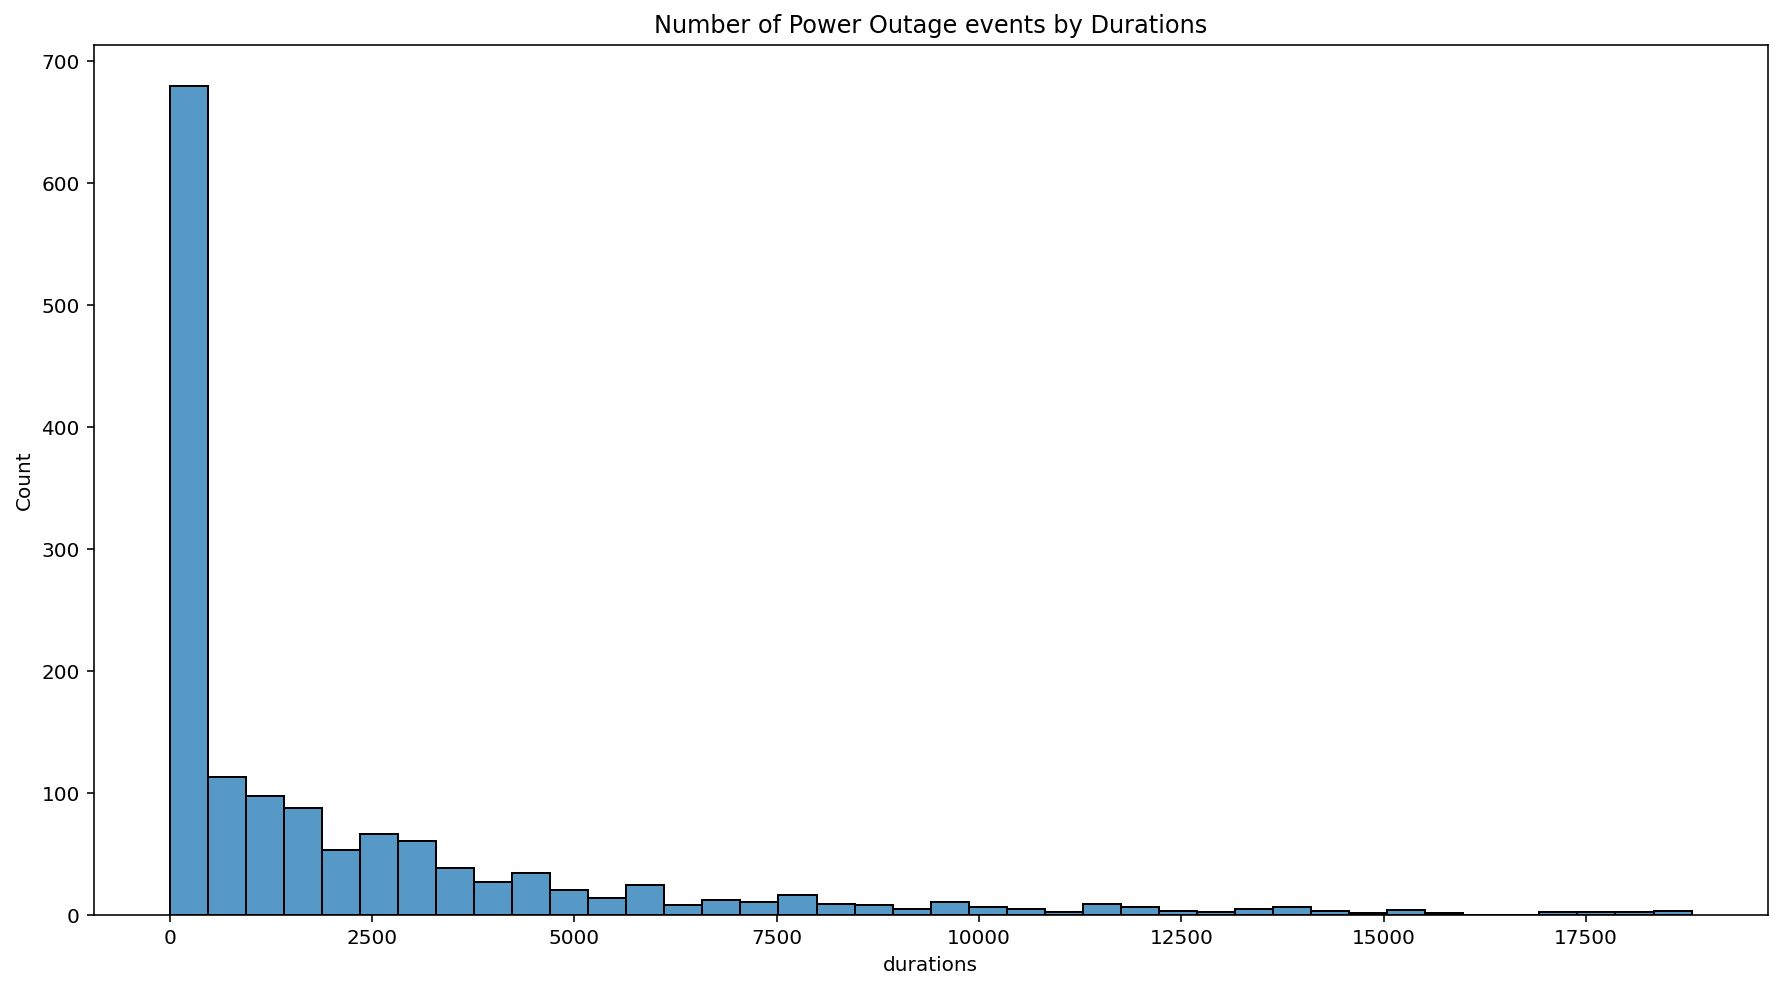

In [20]:
# DISTRIBUTION OF OUTAGE DURATIONS (outerliers; time > 40k truncated)
fig = plt.figure(figsize = (15,8))
plt.title('Number of Power Outage events by Durations')
plt.xlabel('durations')
outage_durations = (outages_clean['outage.duration'][outages_clean['outage.duration'] < 20000])

ax = sns.histplot(data = outage_durations)

Next, we explored the distribution of outages by month. The output softly resembles a bimodal curve after being sorted by months, which is to be expected because a lot of severe weather events that would cause power outages occur during the summer months (jun, jul, aug) and winter months (dec, jan, feb). However, power outages seem to be significantly more common in summer in comparison to winter, even though logically the peaks should be similar as both seasons witness comparable amounts of power outage causing events.

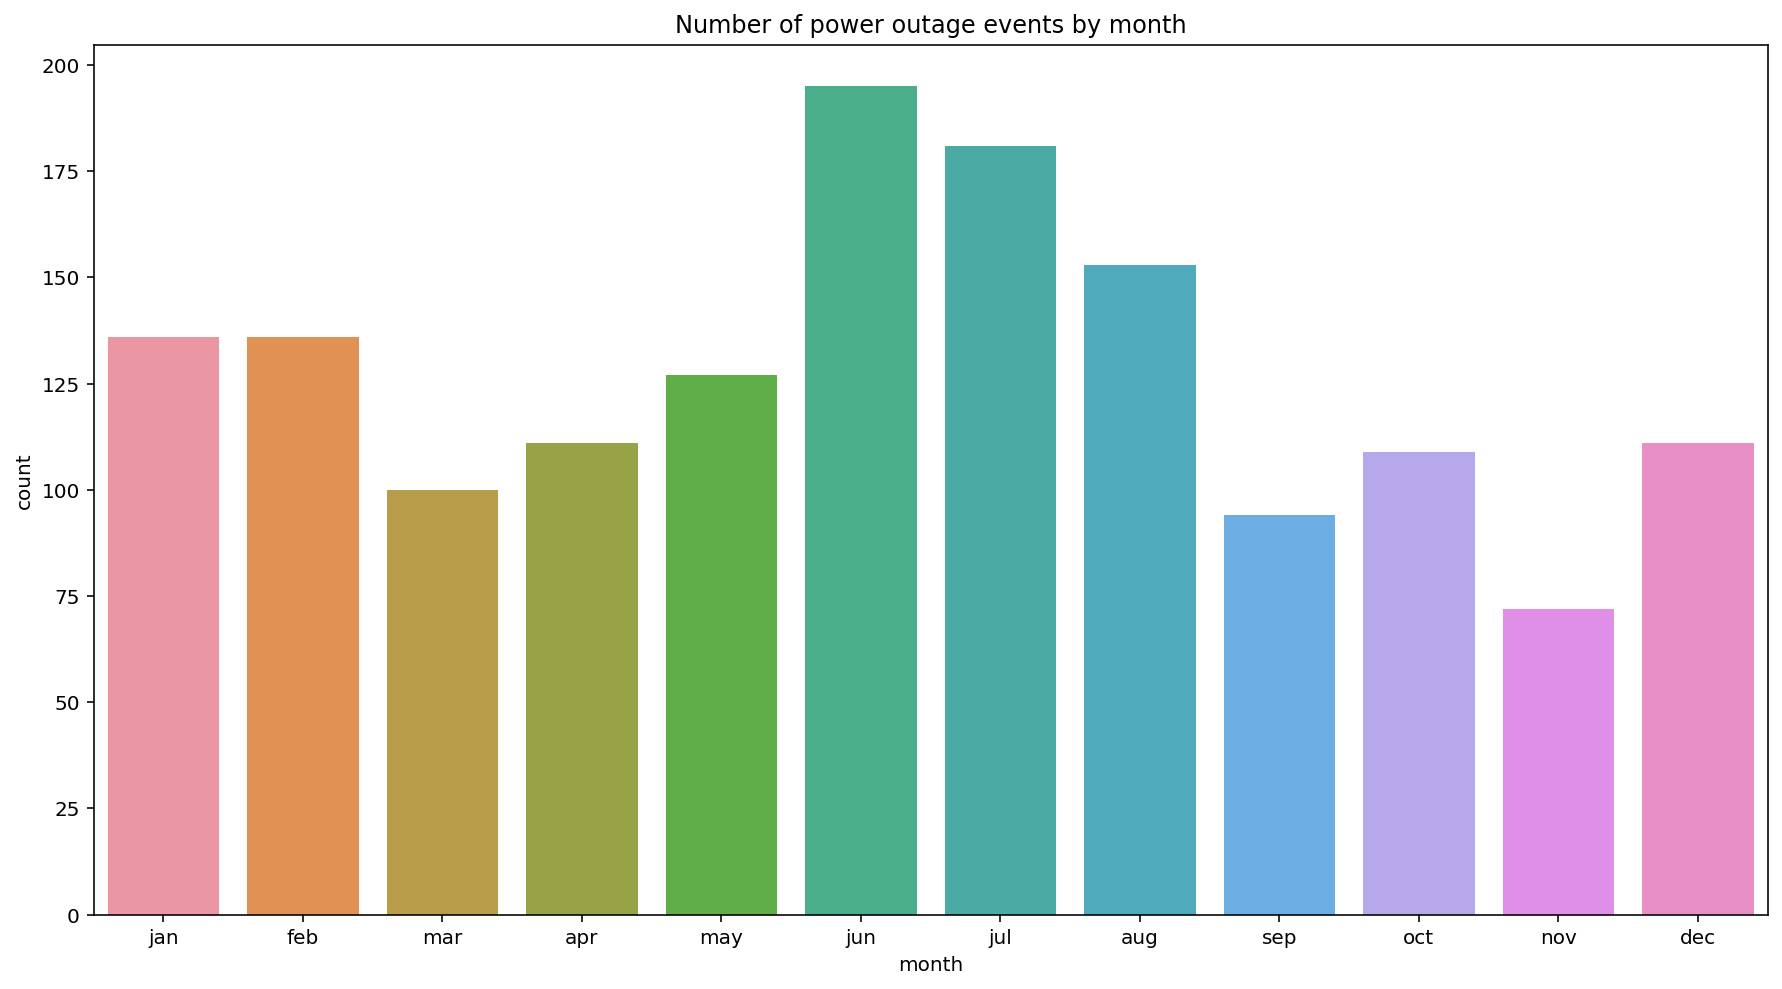

In [21]:
plt.figure(figsize = (15,8))
# generate count of power outage events by month, reorder to be in calendar sequence

temp = pd.DataFrame(outages_clean.groupby('month')['start'].count())
new_order = ['jan', 'feb', 'mar', 'apr', 'may','jun','jul','aug','sep','oct','nov','dec']
out = temp.reindex(new_order).reset_index()
plt.title('Number of power outage events by month')
ax = sns.barplot(x='month', y='start', data = out)
plt.ylabel('count');

To further investigate this, we plotted the aggregation by seasons instead of months to more clearly exemplify the difference between summer and winter. As can be seen in the plot below, summer witnessed more than 500 outages while winter only saw around 400 outages. This seems to indicative of some confounding variable that is inflating summer's count. We posit that this unexpected difference may potentially be due to a specific cause category 🤔.

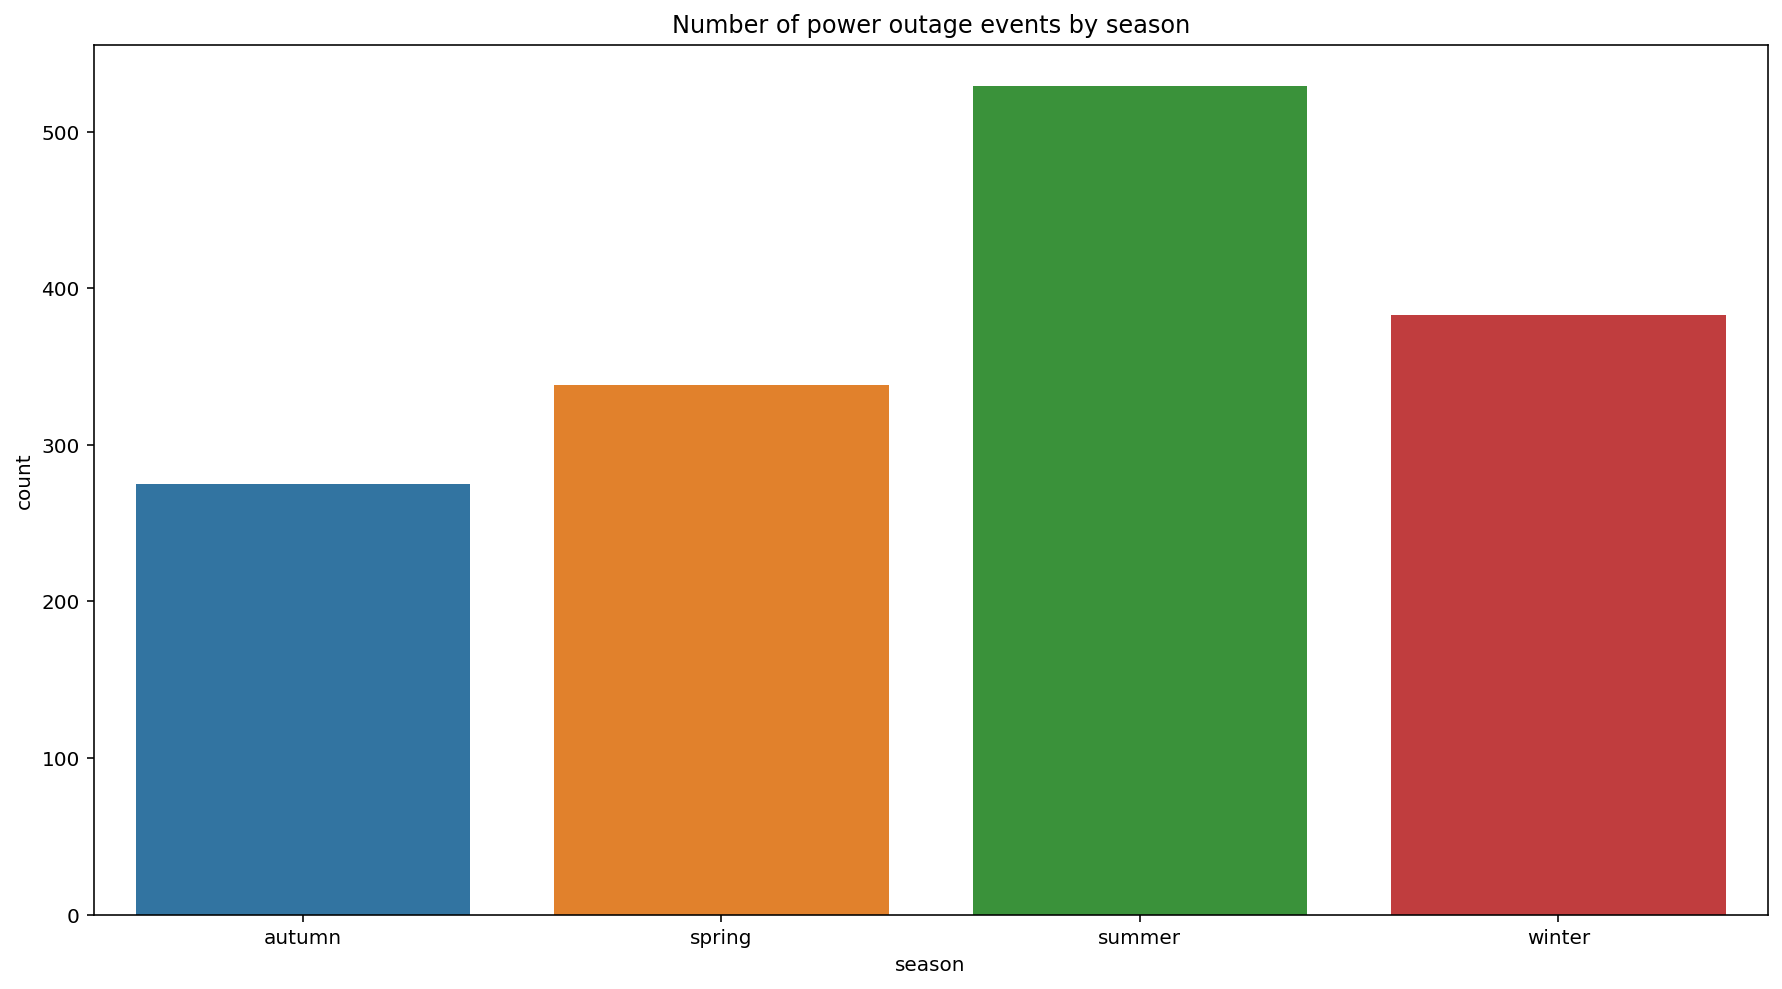

In [22]:
plt.figure(figsize = (15,8))
# plot of power outages by season

temp = (pd.DataFrame(outages_clean.groupby('season')['start'].count()).reset_index())
plt.title('Number of power outage events by season')
ax = sns.barplot(x='season', y='start', data = temp)
plt.ylabel('count');

After that, we decided to take a look at the 7 major power outage cause categories. As expected, severe weather is the most common, but surprisingly, intentional attacks is a very common cause for power outages, being the second most common within our dataset. I guess being anarchist is in fashion? It's difficult to conclude the reason for the prevalence of this cause category. One potential explanation is that maybe intentional attacks are a blanket term that covers a larger variety of cases, much like how severe weather is very much so a blanket term. One category of interest is the 'public appeal' category. On first glance, this category seems ridiculous! Who in their right mind would want their power grid turned off 🤬?? It's also a relatively common category, being the middle most common one to occur. This category deserves more investigation.

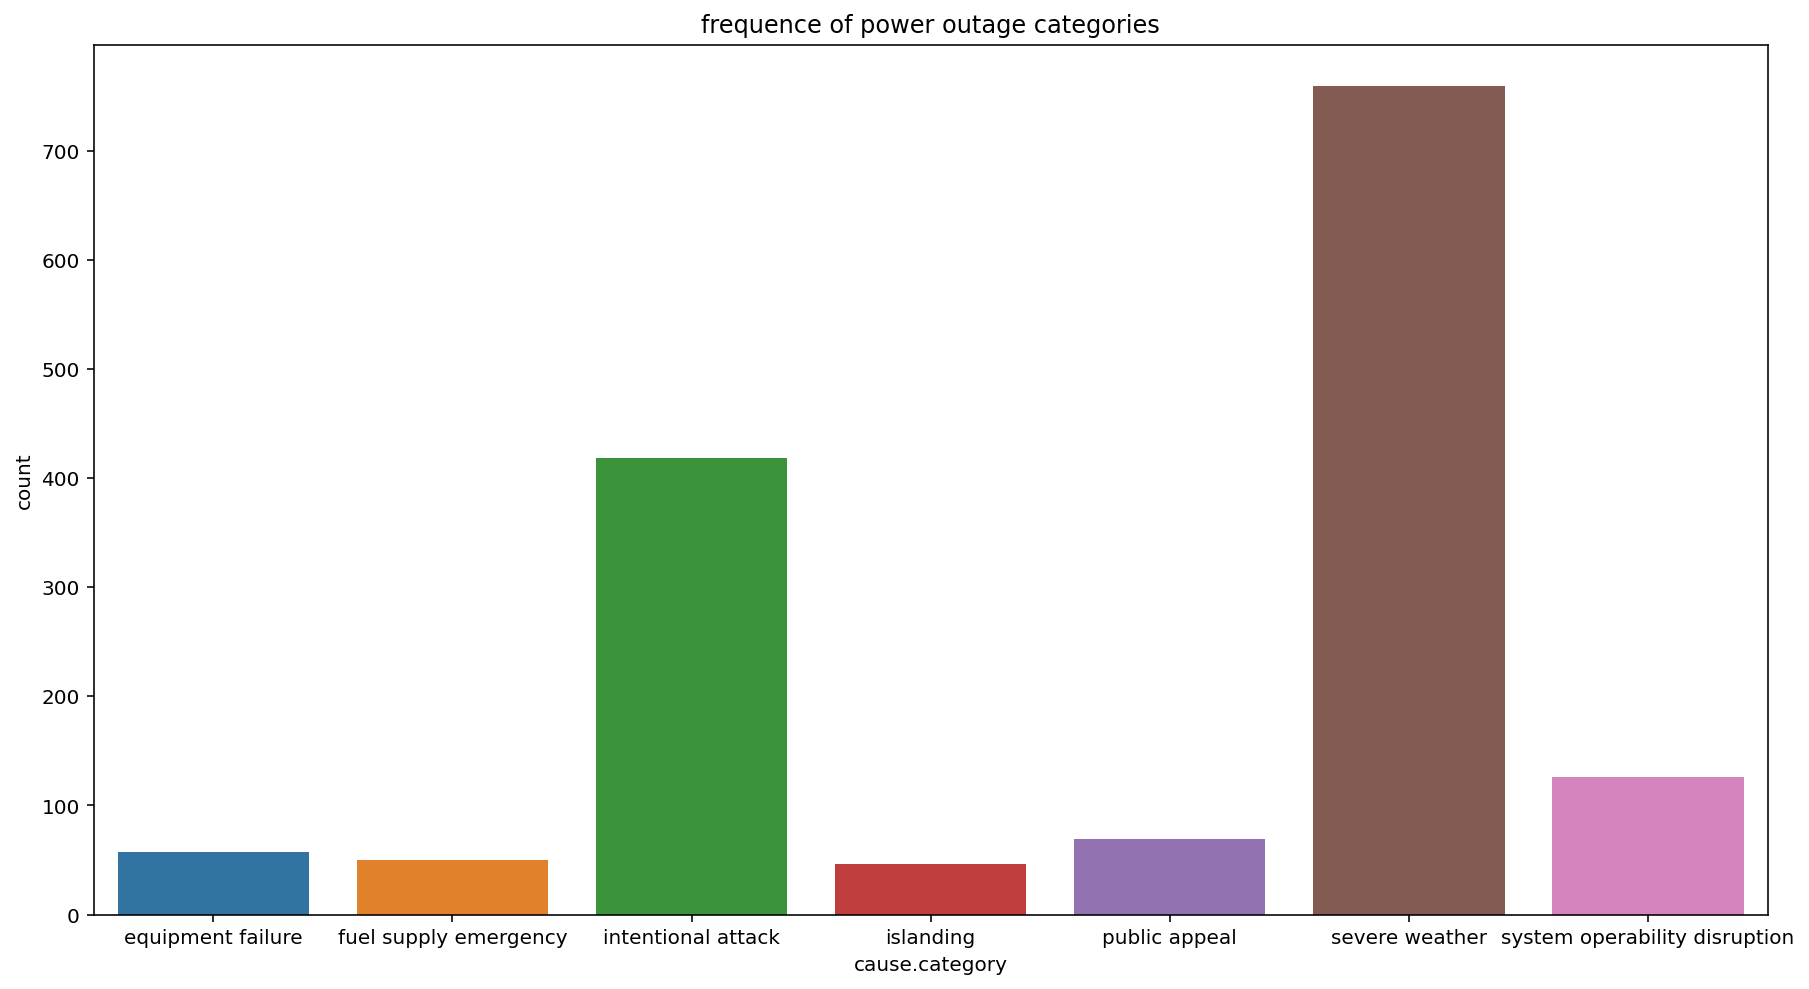

In [23]:
# frequency of power outage categories
data = (outages_clean.groupby('cause.category')['start'].count().reset_index())
plt.figure(figsize = (15,8))
plt.title('frequence of power outage categories')

ax = sns.barplot(x='cause.category', y='start', data = data)
plt.ylabel('count');

We decided to plot the occurrences of public appeal by month, which quickly reveals that they almost exclusively occur in the summer months (jun, jul, aug). This is quite suspicious! There is definitely something going on with public appeal as a category. This perplexing distribution of where public appeal outages occur seems to be the result of a confounding variable, but it could just be a statistical anomaly. We will explore this further in the [hypothesis testing](#hypothesis-and-permutation-testing) section. For now, our initial theory is that public appeal outages are **intentional**. Since they're only occurring within a specific season (Summer), this seems to indicate that public appeal outages are **engineered** rather than induced by weather. It's still too early to make a solid conclusion though, so this will be investigated more. One possible explanation for public appeal could be the practice of rotating engineered outages across certain residential districts during the summer months to ensure the power grid does not completely shut down, though this is an iniital speculation.

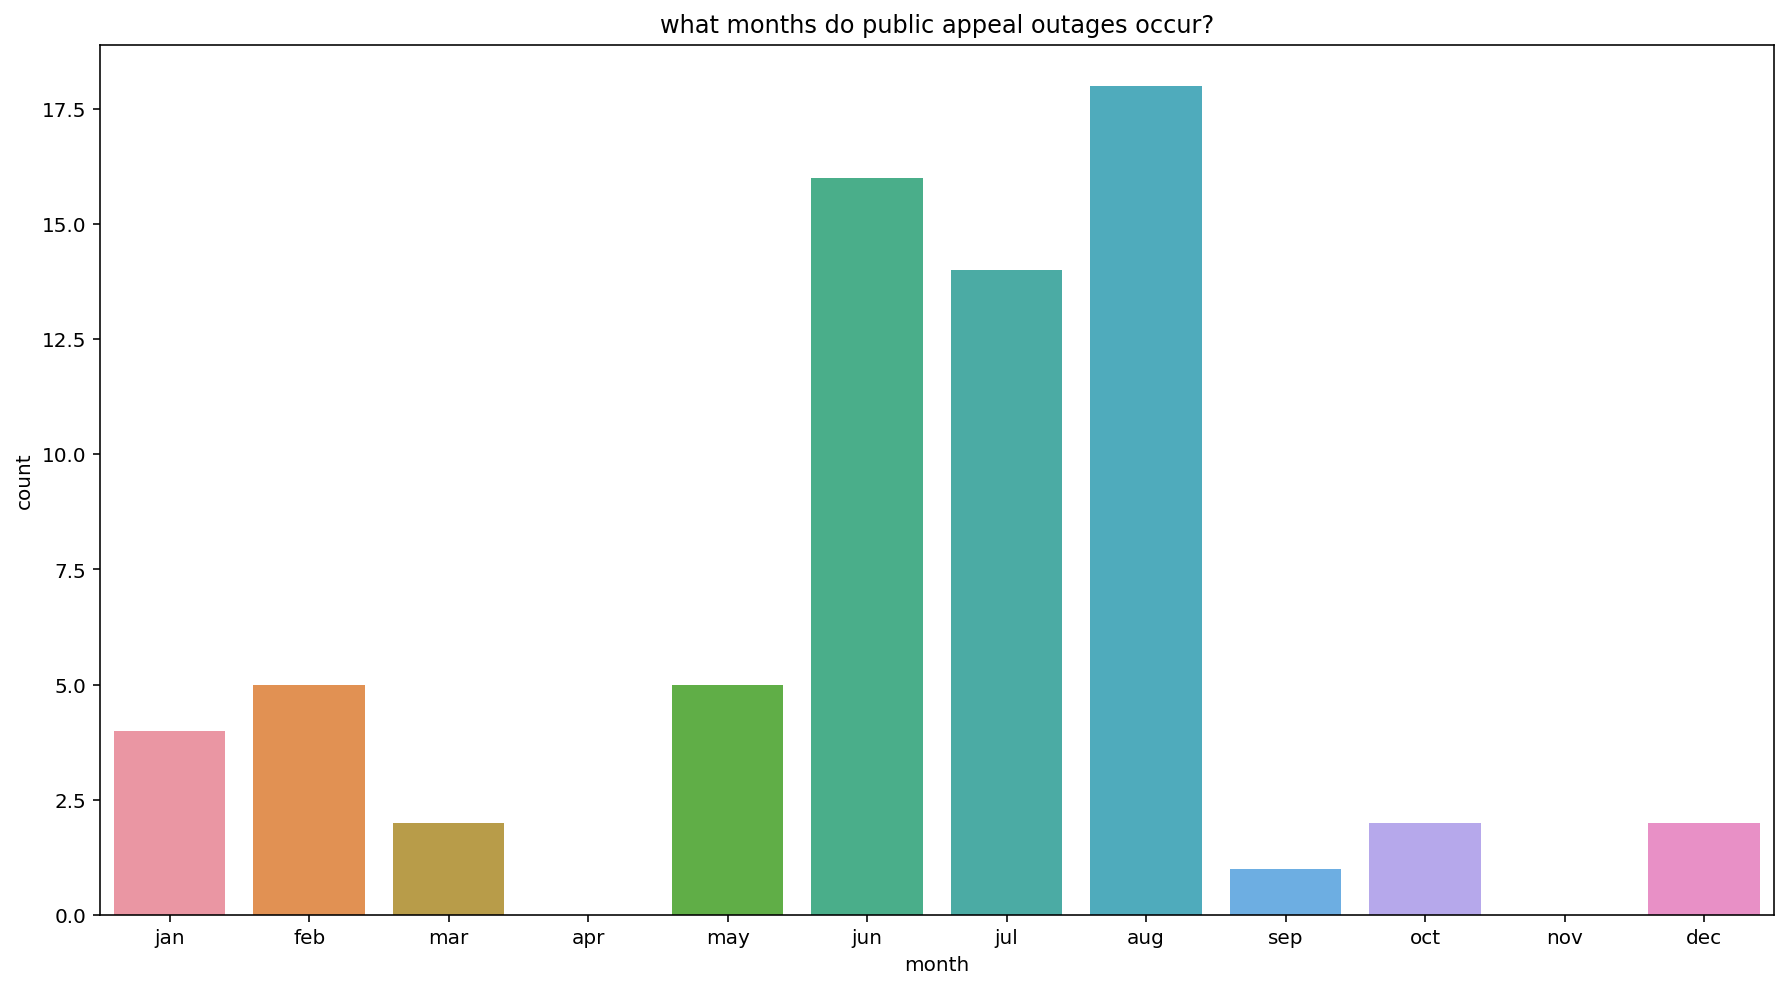

In [24]:
# occurrence of public appeal outages by month
plt.figure(figsize = (15,8))
new_order = ['jan', 'feb', 'mar', 'apr', 'may','jun','jul','aug','sep','oct','nov','dec']
temp = (outages_clean[outages_clean['cause.category'] == 'public appeal'].groupby('month')['start'].count())
out = temp.reindex(new_order).reset_index()
plt.title('what months do public appeal outages occur?')
ax = sns.barplot(x='month', y='start', data = out)
plt.ylabel('count');

When we look at the distribution of power outages by seasons excluding public appeal, we see the gap between summer and winter close slightly. The gap still remains large, but this seems more plausible of a gap, though there may still be some external factor(s) influencing summer's frequency of outages.

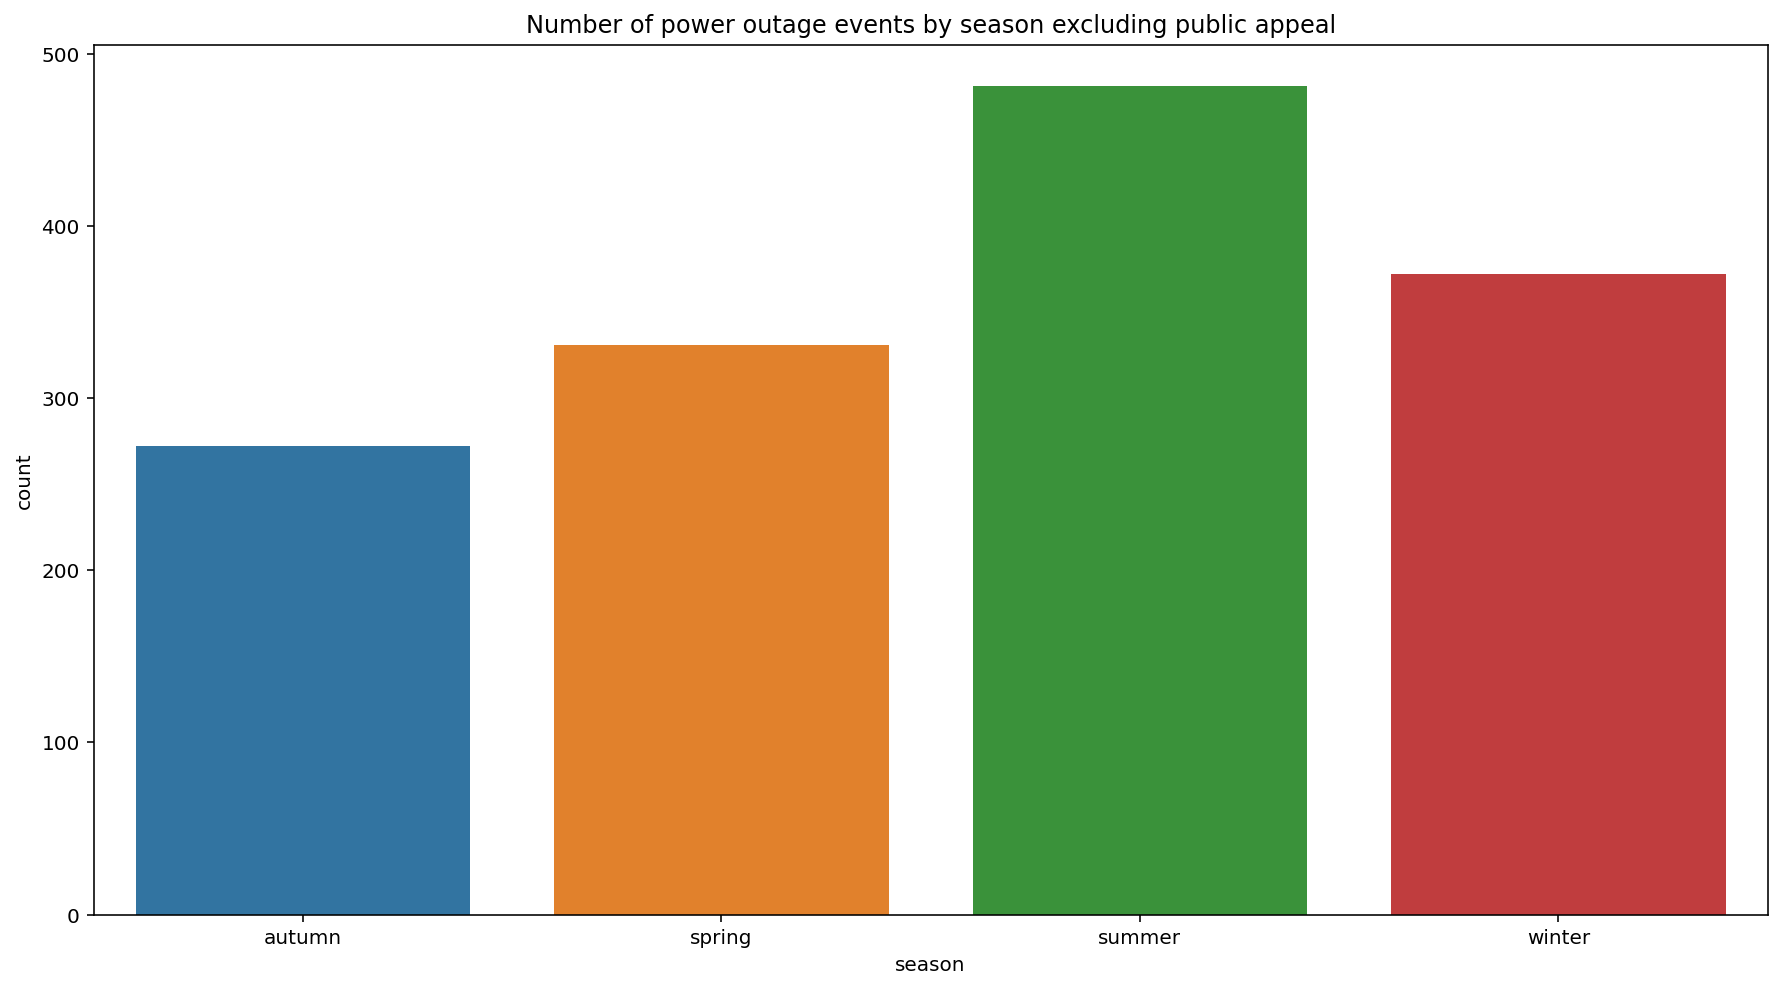

In [25]:
plt.figure(figsize = (15,8))
# generate count of power outage events excluding public appeal by month, reorder to be in calendar sequence

temp = (pd.DataFrame(outages_clean[outages_clean['cause.category']!='public appeal'].groupby('season')['start'].count()).reset_index())
plt.title('Number of power outage events by season excluding public appeal')

ax = sns.barplot(x='season', y='start', data = temp)
plt.ylabel('count');

In order to explore this more deeply, we geoplotted the frequency of pubilc appeal outages by state. The resulting map plot displays that relatively few states have public appeal outages, and of those who have, only the four states California, Texas, Louisiana, and Arkansas have used them multiple times. 🤔 Depending on the weather pattern of the state, this seems to support our idea that public appeal outages are engineered.

Note: Blacked out states means that there was no available data for the plot to display.

In [55]:
#geoplot of public appeal outage frequency across the US
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

#create data for intentional attack frequency by postal code
temp = outages_clean.copy()
temp['postal.code'] = outages_clean['postal.code'].str.upper()
temp = (pd.DataFrame(temp[temp['cause.category'] == 'public appeal'].groupby('postal.code')['year'].count()).reset_index())

m = folium.Map(location=[40, -102], zoom_start=5)

#create geoplot
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=temp.fillna(0),
    columns=["postal.code", "year"],
    key_on="feature.id",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Frequency of public appeal outages",
).add_to(m)

folium.LayerControl().add_to(m)

m

Texas, who by far had the most public appeal outages seemed to have them during both Summer and Winter, when house hold appliances such as heaters/AC are used. Texas has hot and humid Summers, seeing temperatures 90+ degrees Fahrenheit regularly. Winters are cold, dry, and windy, seeing temperatures as low as 30 degrees Fahrenheit. Texas' unique geographic location also means that it's subject to droughts, blizzards, thunderstorms, tornadoes, and hurricanes. It's easy to see why they potentially would've had to shut down the power grid manually to make sure it's still intact.

In [27]:
display(outages_clean[(outages_clean['cause.category'] == 'public appeal') & (outages_clean['u.s._state'] == 'texas')].groupby('season')['start'].count())

season
autumn     1
summer    11
winter     5
Name: start, dtype: int64

Louisiana had them mostly in the summer, when household appliances such as fans/AC are used. Like Texas, Louisiana sees a lot of extreme weather events that would place a load on the power grid (hurricanes, floods, storms, etc.). Their summers are also notoriously hot and humid, warranting the heavy use of AC in most households. This combined means that it utilizes many induced power outages to maintain the power grid.

In [28]:
display(outages_clean[(outages_clean['cause.category'] == 'public appeal') & (outages_clean['u.s._state'] == 'louisiana')].groupby('season')['start'].count())

season
summer    13
winter     1
Name: start, dtype: int64

On the other hand, California had them most during the Summer and the rest in spring. Though California is not subject to such extreme weather conditions, it does have its own hallmark issue of wildfires. The time frame of public appeal outages seems to follow along with wildfire season for California. Winters in California are relatively mild in comparison, if anything there's just a lot of rain. Nothing that would particularly warrant induced outages to protect the power grid. Thus, summer, and presumably wildfires are the reason why California sees the second most public appeal outages.

In [29]:
display(outages_clean[(outages_clean['cause.category'] == 'public appeal') & (outages_clean['u.s._state'] == 'california')].groupby('season')['start'].count())

season
autumn    1
spring    3
summer    4
winter    1
Name: start, dtype: int64

Arkansas only had them in the summer, when household appliances such as fans/AC are used. During the Summer months (Jun, Jul, Aug), the weather shoots up to 90+ degrees Fahrenheit regularly. Though the region is not subject to any specific severe weather that would warrant an induced outage (Arkansas sees tornados and thunderstorms), the regular high temperatures during Summer would presumably place a heavy load on the power grid.

In [30]:
display(outages_clean[(outages_clean['cause.category'] == 'public appeal') & (outages_clean['u.s._state'] == 'arkansas')].groupby('season')['start'].count())

season
summer    7
Name: start, dtype: int64

Again, these results are lending more credence to our theory that public appeal outages are intentional. The frequency of these outages coincide with periods of time where extreme weather conditions are observed, yet these types of outages are only employed by states that observe very extreme weather events such as wildfires, blizzards, hurricanes, etc.

Next, we took a look at intentional attacks. We plotted the number of occurrences by month and saw that the distribution is relatively uniform. There seems to be a noticeable spike around January, which is difficult to analyze. One possible explanation is that this is the month of New Years festivities, which for what it's worth could fuel people to attack power plants. it's a weak explanation, but it's most likely there because of a coincidence, it may not indicate anything particularly significant.

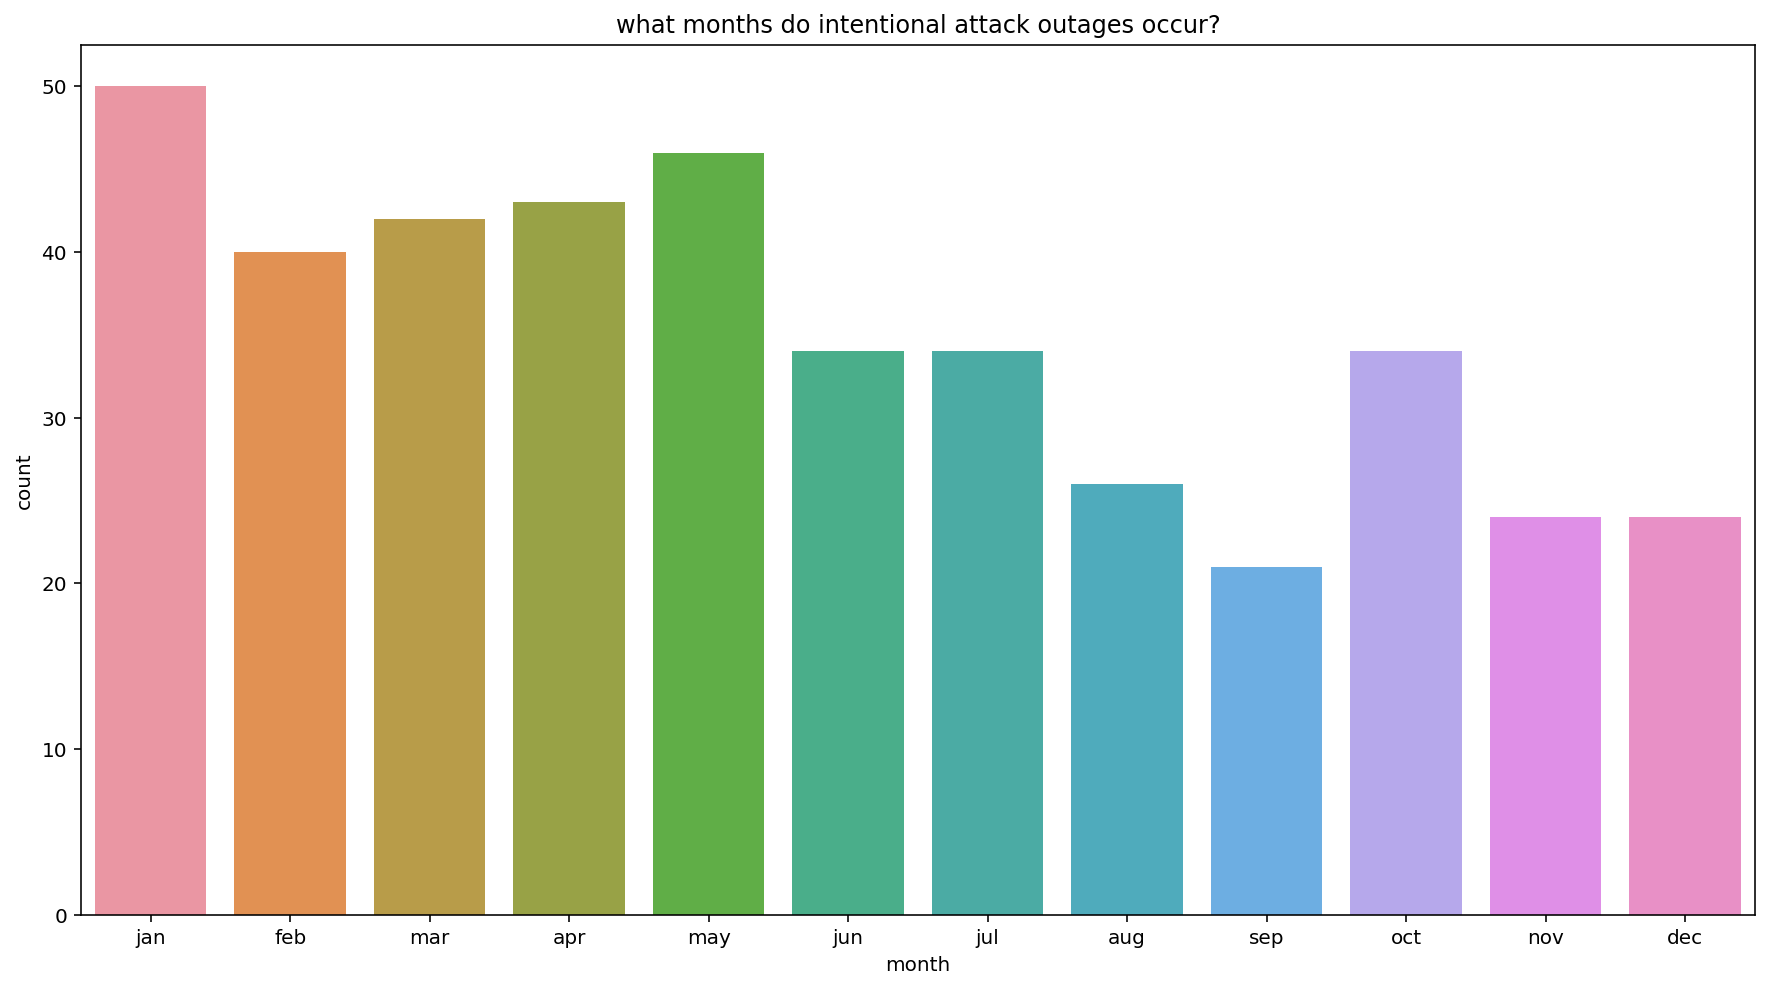

In [31]:
# what's up with intentional attacks?
plt.figure(figsize = (15,8))
new_order = ['jan', 'feb', 'mar', 'apr', 'may','jun','jul','aug','sep','oct','nov','dec']
temp = (outages_clean[outages_clean['cause.category'] == 'intentional attack'].groupby('month')['start'].count())
out = temp.reindex(new_order).reset_index()
plt.title('what months do intentional attack outages occur?')
ax = sns.barplot(x='month', y='start', data = out)
plt.ylabel('count');

When we take a look at which years intentional attacks occur, we observe something incredibly perplexing. Intentional attacks were most common in the year 2011, scaling downwards as the years progressed. Before 2011, there were basically no recorded instances of intentional attacks. 🤔 Definitely something worth investigating in a later section.

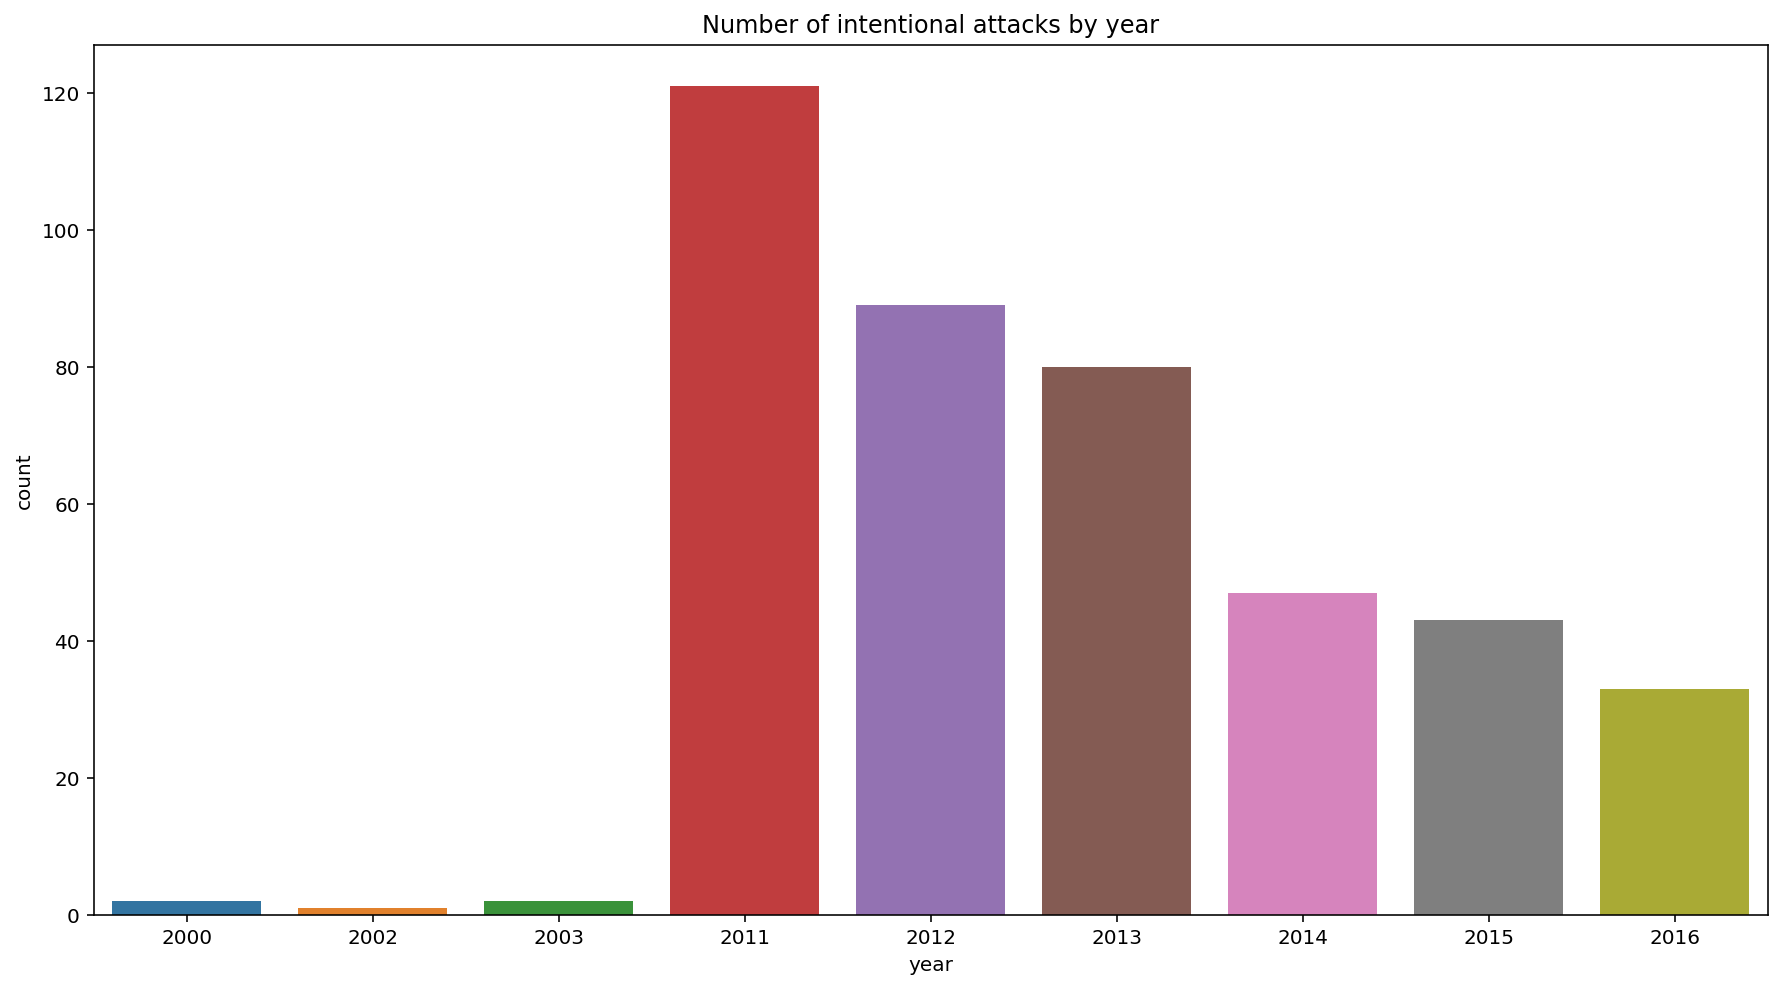

In [32]:
plt.figure(figsize = (15,8))
plt.title('Number of intentional attacks by year')

ax = (sns.barplot(x = 'year', y='start', data = (pd.DataFrame(outages_clean[outages_clean['cause.category'] == 'intentional attack'].groupby('year')['start'].count()).reset_index())))
plt.ylabel('count');

We theorized that the perplexing result may have been due to a fault in the data generating process in the sense that perhaps the early years weren't recorded because there was no data category to classify them, but as can seen below the intentional attacks that occurred in 2000-2003 were caused by vandalism, probably the most common category. This means that the missing occurrences between 2004 and 2010 may not necessarily be a problem with the data generating process. It's very difficult to conclude the reason for why there were no intentional attack outages from 2004-2010.

In [33]:
# intentional attack types before 2004
display(outages_clean[(outages_clean['cause.category'] == 'intentional attack') & (outages_clean['year'] < 2004)].get('cause.category.detail').value_counts())

vandalism    5
Name: cause.category.detail, dtype: int64

In [34]:
# intentional attack types after 2004
display(outages_clean[(outages_clean['cause.category'] == 'intentional attack') & (outages_clean['year'] > 2004)].get('cause.category.detail').value_counts())

vandalism              330
sabotage                32
suspicious activity      3
Name: cause.category.detail, dtype: int64

To further develop our intuition regarding this problem, we considered if there were a wide variety of intentional attacks that may not have been accounted for in earlier years, but may have been added later on. The plot below indicates that there have only ever been 3 types of intentional attacks, ruling out that possible explanation.

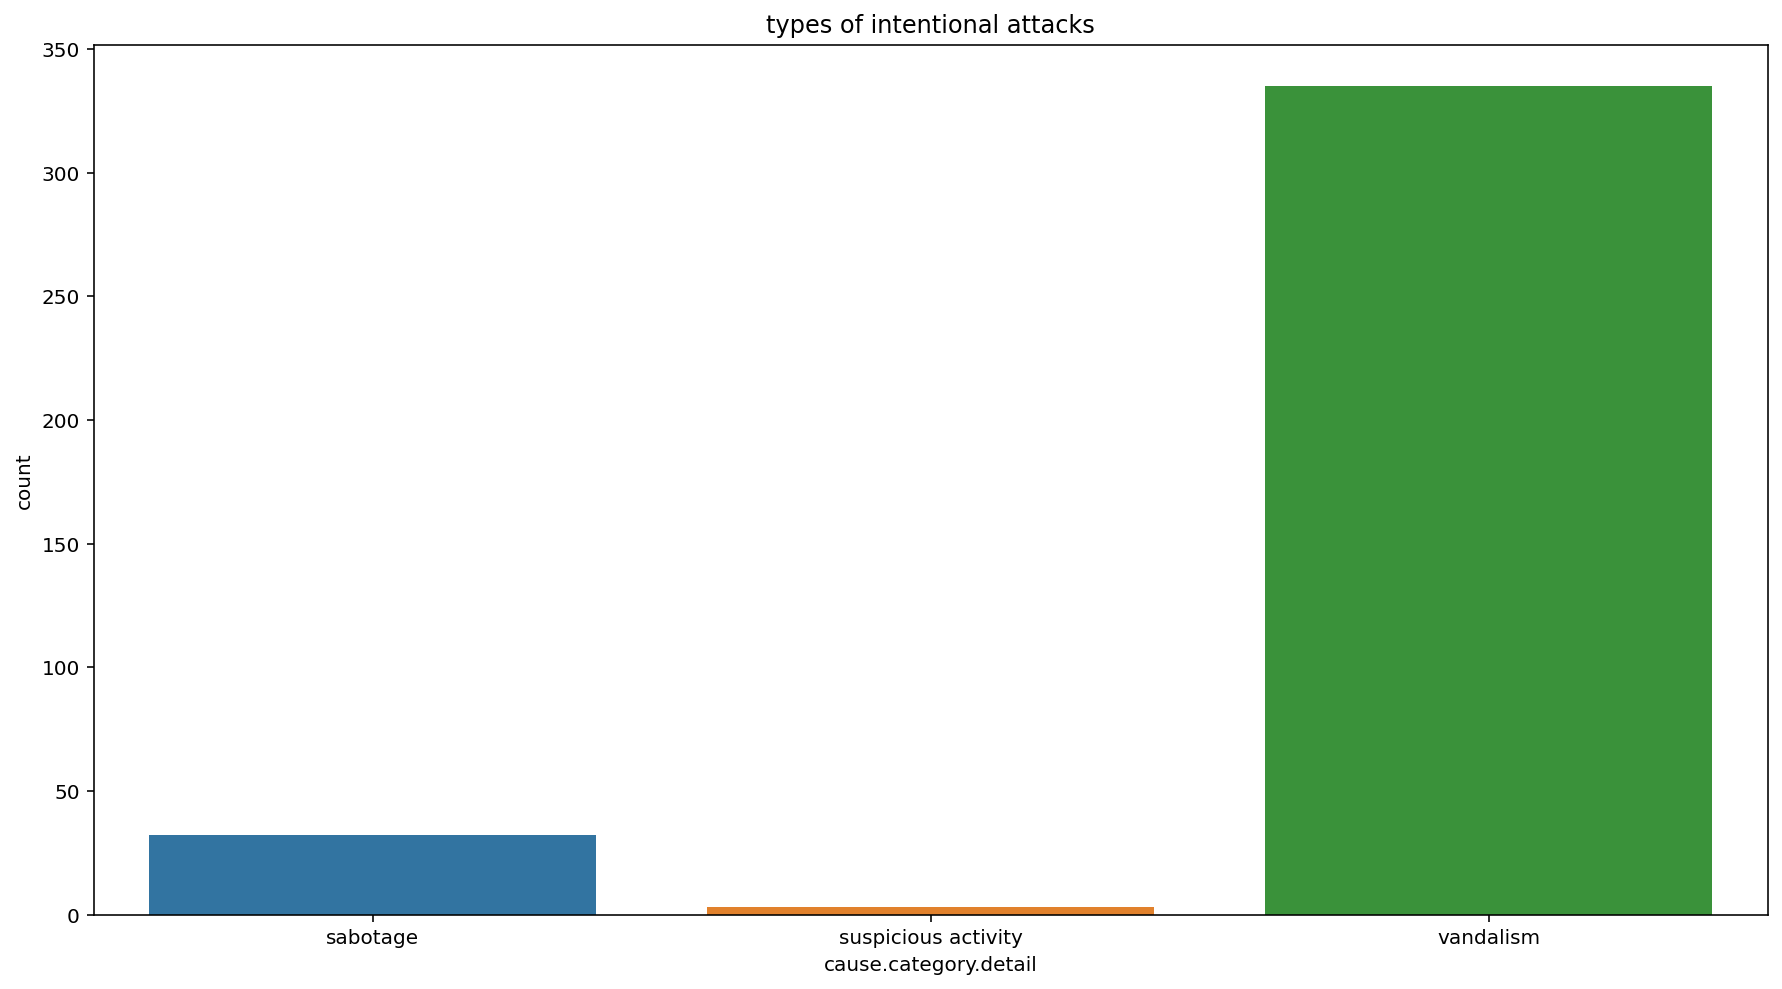

In [35]:
#what types of intentional attacks do we see?
plt.figure(figsize = (15,8))
plt.title('types of intentional attacks')
temp = (pd.DataFrame(outages_clean[outages_clean['cause.category'] == 'intentional attack'].groupby('cause.category.detail')['start'].count()).reset_index())
ax = sns.barplot(x = 'cause.category.detail', y='start', data = temp)
plt.ylabel('count');

It's important to note that the cause category detail seemed to have a lot of missingness for intentional attack causes. This means that our analysis of this category is incomplete as the missing data may account for another category that has not been classified yet. The missingness of this will be explored in a later section.

In [36]:
# number of missing cause category details for intentional attacks
pd.DataFrame(outages_clean[outages_clean['cause.category'] == 'intentional attack'])['cause.category.detail'].isna().sum()

48

In the interest of investigating intentional attacks further, knowing the aforementioned limitations, we again geoplot the frequency of intentional attack outages by state. The resulting plot shows that intentional attacks are relatively uniform across the country, with very few that have "peaceful" residents.

Note: Blacked out states means that there was no available data for the plot to display.

In [37]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

#create data for intentional attack frequency by postal code
temp = outages_clean.copy()
temp['postal.code'] = outages_clean['postal.code'].str.upper()
temp = (pd.DataFrame(temp[temp['cause.category'] == 'intentional attack'].groupby('postal.code')['year'].count()).reset_index())

m = folium.Map(location=[42, -102], zoom_start=5)

#create geoplot
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=temp.fillna(0),
    columns=["postal.code", "year"],
    key_on="feature.id",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Frequency of intentional attack outages",
).add_to(m)

folium.LayerControl().add_to(m)

m

It's worthwhile to note that it appears that washington is so purple because of the year 2011, where it witnessed almost 30 outages due to intentional attacks. We searched for potential explanations, but there was no clear indication of why, in particular, people living in Washington in the year 2011 decided that they hated their power grid.

In [38]:
# number of intentional attack outages in washington in the year 2011 
display(outages_clean[(outages_clean['cause.category']== 'intentional attack') & (outages_clean['year'] == 2011) & (outages_clean['u.s._state'] == 'washington')].shape[0])

29

As a corollary to the point of abnormal distribution of power outage occurrences by year (mentioned in the [interesting aggregates section](#interesting-aggregates)), we have plotted the number of power outages by year. This more clearly establishes the very real abnormality within the years 2011-2015. In particular, 2011 towered over the other years, witnessing almost 300 outages on its own, which is more than the first 5 years of the dataset combined. What happened in the year 2011? Why was 2011-2015 so devastating in terms of power? 

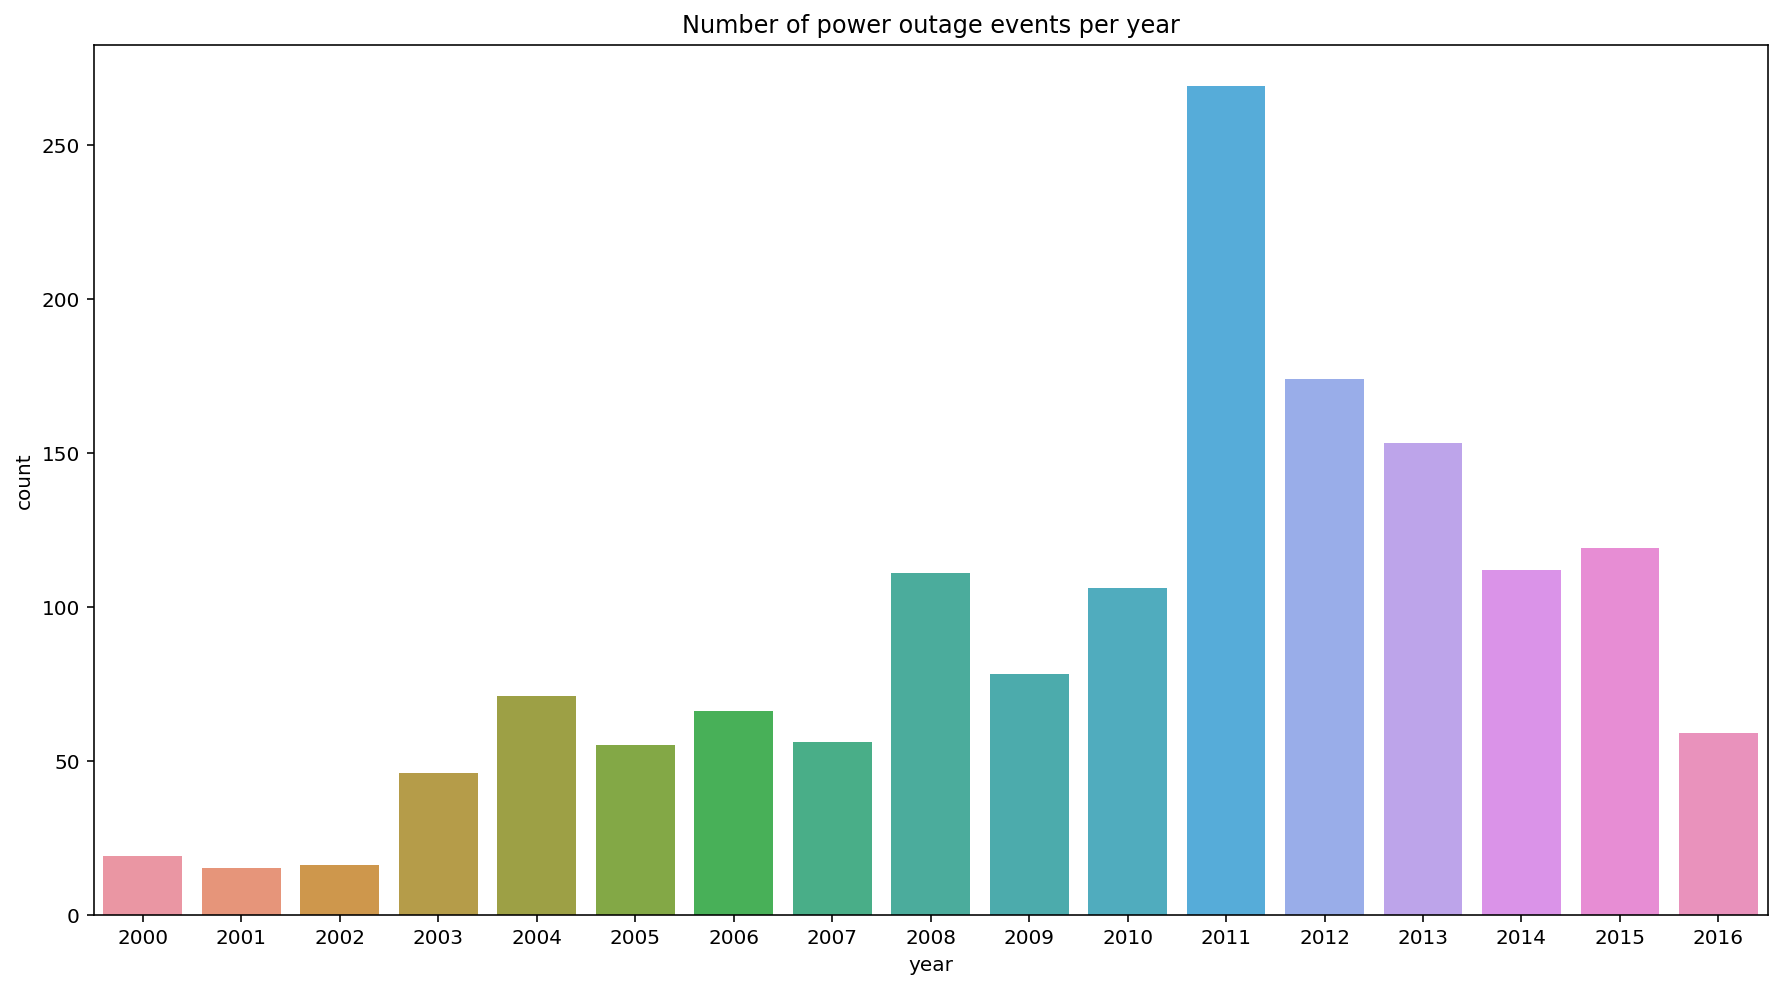

In [39]:
plt.figure(figsize = (15,8))
plt.title('Number of power outage events per year')

ax = (sns.barplot(x = 'year', y='start', data = (pd.DataFrame(outages_clean.groupby('year')['start'].count()).reset_index())))
plt.ylabel('count');

### Bivariate Analysis

Lastly for EDA, we began to perform bivariate analysis. For This section, we explored columns in relation to others to investigate if some sort of relationship exists between them.

The first relationship we hypothesized was a correlation between the columns 'outage.duration' and 'demand.loss'. Initially, we believed that the two would have a strong correlation because logically speaking, longer durations probably affect demand loss. However, the trend we observed did not indicate such at all. Our scatterplot between them showed a perplexing trend that seemed to indicate that the two have next to no correlation to each other. It seems that regardless of the outage duration, the demand loss is dependent on another data column, presumably population or state. This could suggest that the durations that last for a really long time don't get fixed because they were in an area that was of less importance (i.e. low population, rural area, etc.).

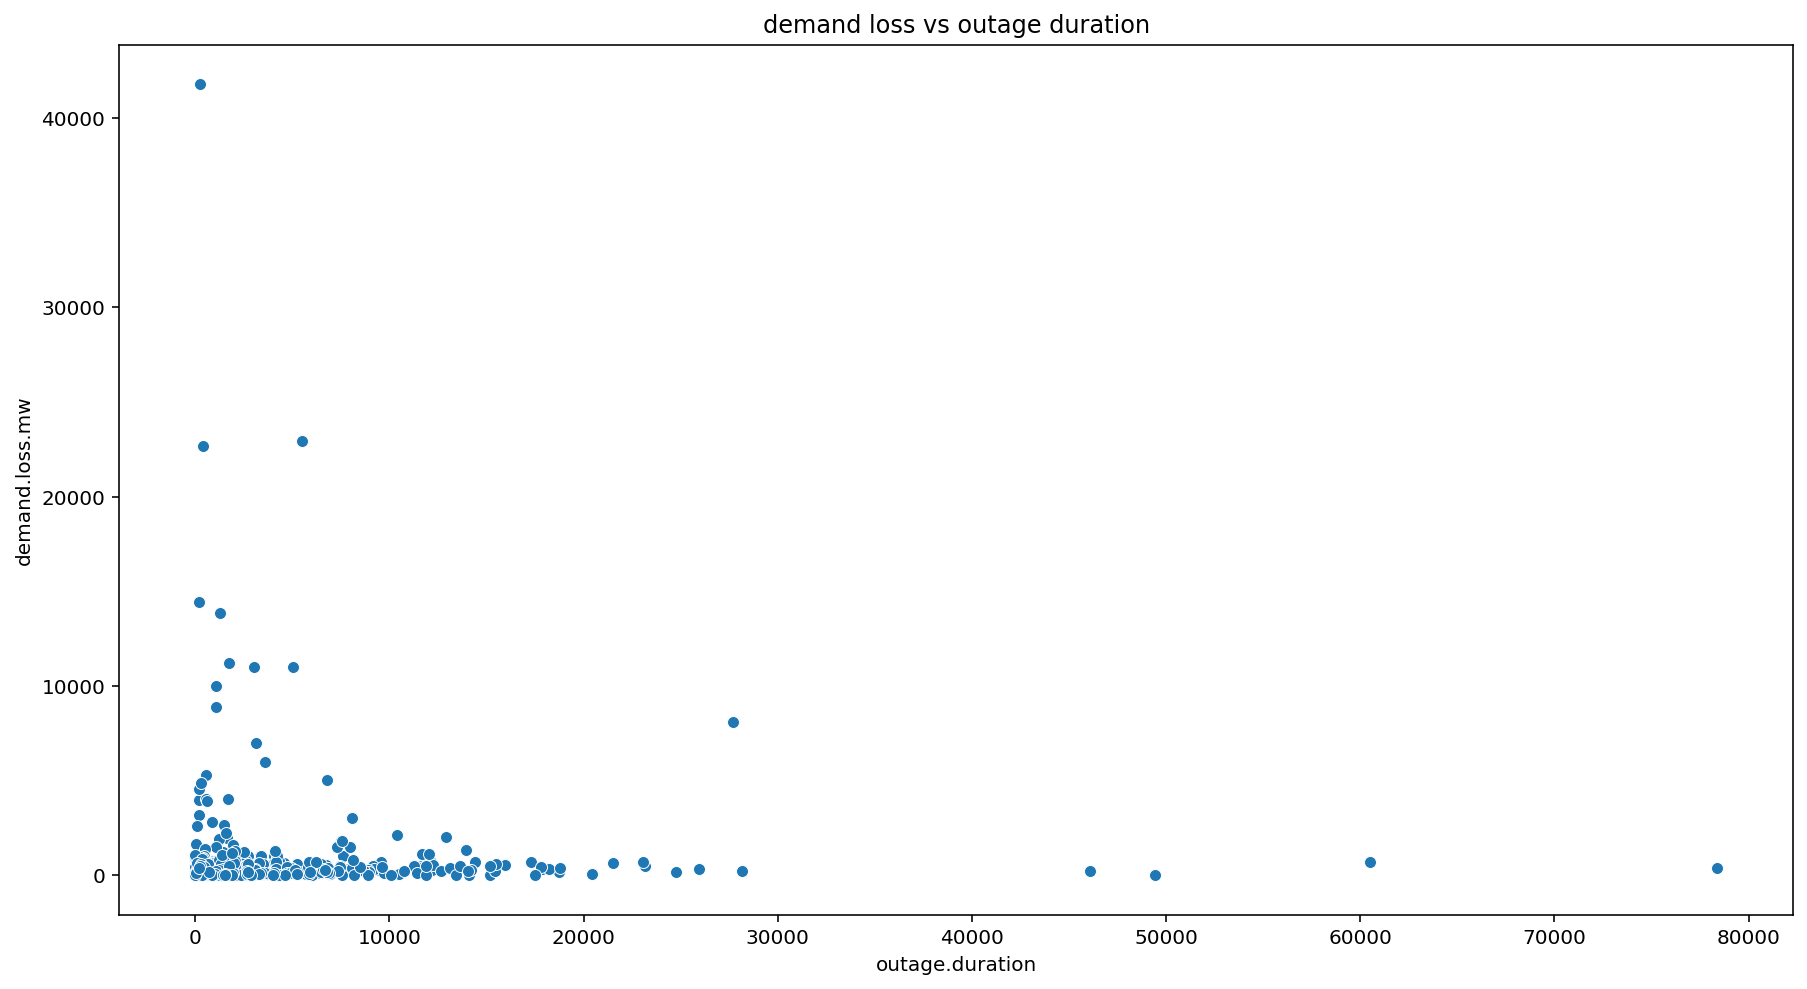

In [40]:
# SCATTER - DEMAND LOSS vs. OUTAGE DURATION
plt.figure(figsize = (15,8))
plt.title('demand loss vs outage duration')
ax = sns.scatterplot(data = outages_clean, y='demand.loss.mw', x='outage.duration')

Next, we wanted to explore the correlation between the columns 'outage.duration' and 'customers.affected'. Similarly, we believed that longer outages should affect more customers. In this scatter plot, there seemed to be a better correlation, but it's still relatively weak. The plot suggests that outage duration does not have a strong effect on how many customers are affected. This again, seems to be dependent on another column, possibly state or population.

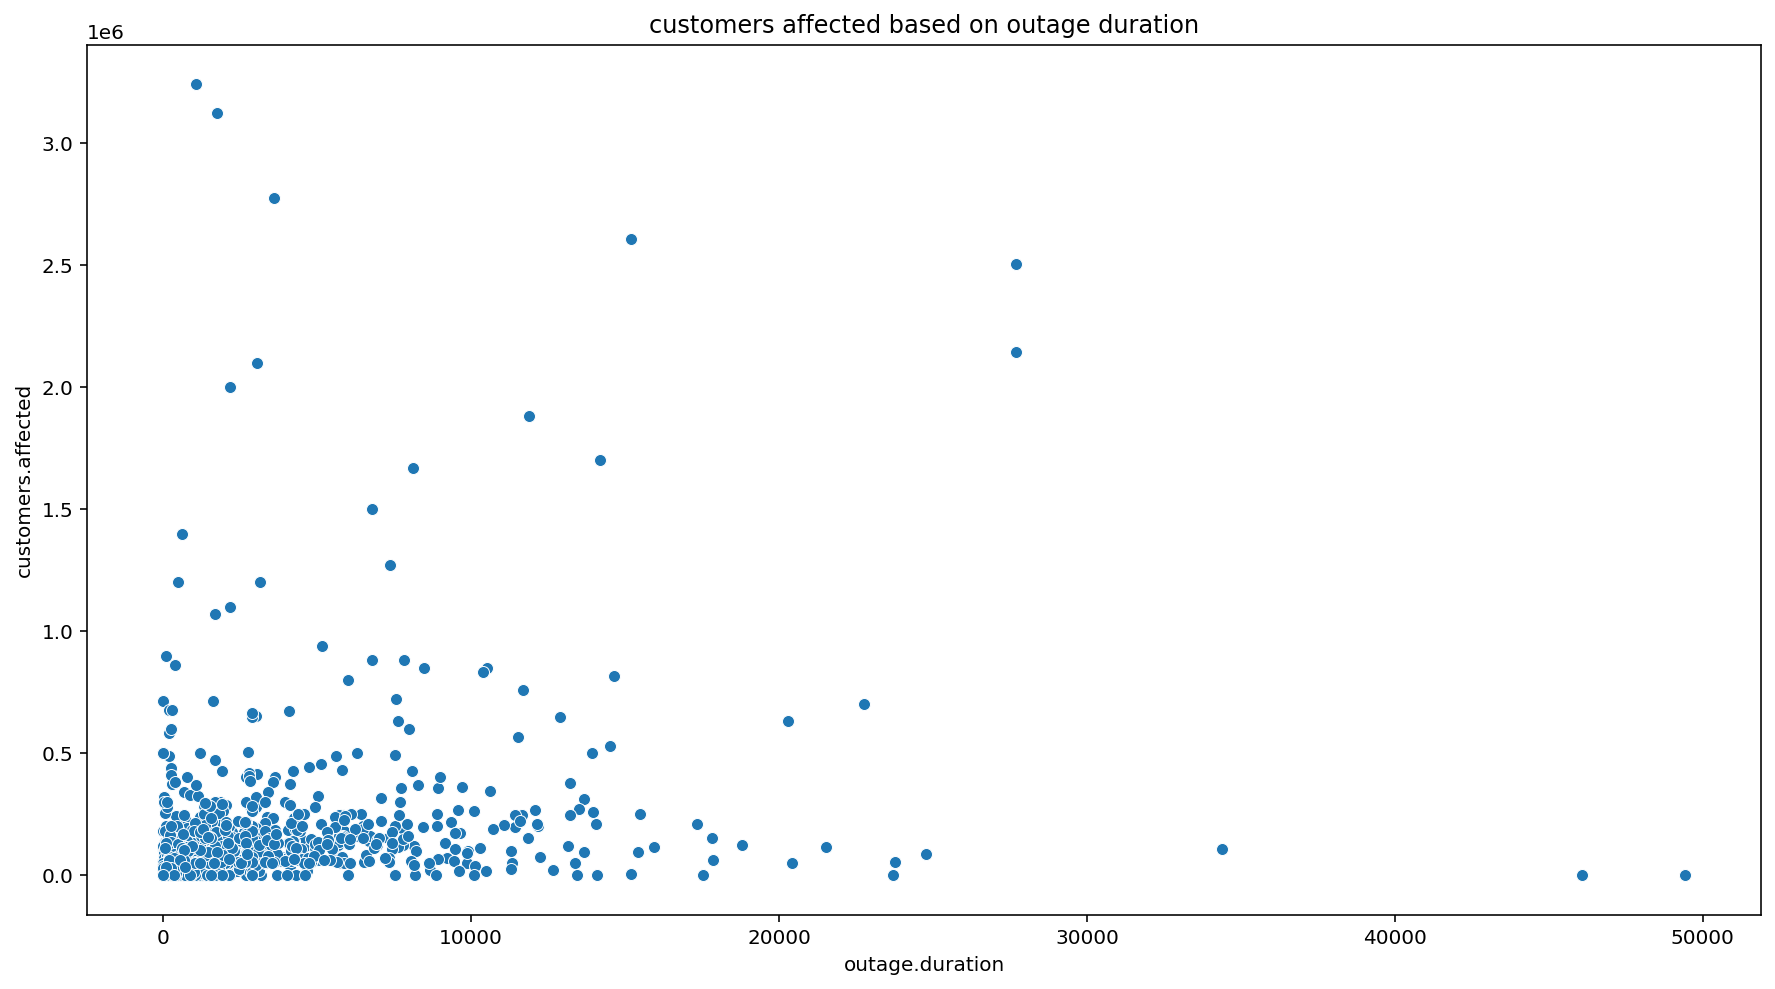

In [41]:
# SCATTER - CUSTOMERS AFFECTED vs. OUTAGE DURATION
plt.figure(figsize = (15,8))
plt.title('customers affected based on outage duration')
ax = sns.scatterplot(data = outages_clean, y='customers.affected', x='outage.duration')

# Assessment of Missingness

To start off, lets explore the missingness that's present in our cleaned dataset. We see that the most prevalent source of missingness is from 'hurricane.names', but this is quickly ruled out as Missing by Design (MD). We can make this conclusion by looking at the form of the data - the only non null values that are present for the column are when there is a hurricane name, i.e. there is a hurricane that caused the power outage. By this logic, if the value is missing, it means that there was no hurricane. The missing value is there on purpose, it is built in as part of the design of the data.

In [42]:
missing_counts_by_col = outages_clean.isna().sum()
missing_counts_by_col[missing_counts_by_col > 25]

cause.category.detail     471
hurricane.names          1462
outage.duration            58
demand.loss.mw            705
customers.affected        443
end                        58
dtype: int64

For our analysis of missingness, we focused on columns with higher occurences of missingness (more than 25). In this case we would be looking at 'outage.duration', 'demand.loss', 'customers.affected', and 'end'.

We chose to not investigate 'cause.category.detail' because we argue that power outages have a variety of nuanced causes that would sometimes be too unique to warrant a cause detail to be defined for it. For example, if there were some freak accident such as a meteroite hitting a power station that causes a power outage, that's an astronomically rare event that would not warrant a cause detail to be defined because it most likely won't happen again. This could explain a lot of the missingness in the column because it's difficult to uniformly account for every cause detail. Continuing on the previous example, even if we did create a new category for the meteorite, the category is essentially useless information as it will never be reapplied again. As such, we found it meaningless to assess the missingness of this column.

Although both 'outage.duration' and 'end' have >25 missing values, we will only be considering the missingness of 'end' because 'outage.duration' is derived from 'end', meaning that their missingness coincides.

This leaves us with determining whether the missingness of columns 'demand.loss', 'customers.affected', and 'end' are Missing at Random (MAR) or Missing Completely at Random (MCAR).

Looking at the large proportion of missing values for 'customers.affected', we believe the missingness to be Not Missing at Random (NMAR/NI). Our hypothesis is that outages that affected very few customers, or even no customers, may not have this data reported, since the outage would not have had a meaningful effect. Outages like this are present due to the other conditions for our dataset, such as it having a large load loss from the grid.


In [43]:
outages_clean['customers.affected'].isna().mean()

0.28878748370273793

To determine this, we will be running a permutation test using the Kolmogorov–Smirnov by permuting the missingness in the column for which we are testing for and comparing the permuted ks-statistics to our observed. We will be doing this with a standard significance level of 0.05 considering the relatively low stakes of our analysis on outages. 

    null: The distribution of our missing and non-missing data come from the same distribution; the missingness is MCAR

    alt: The distribution of our missing and non-missing data do not come from the same distribution; the missingness is MAR

**Is End Missingness Dependent on Year?**

For our first test, we thought to see if missingness in end was dependent on year data, since it could be possible that there were outages that started during the data collection period but was no restored during the data collection period.

In [44]:
missing_end = outages_clean[outages_clean['end'].isna()]['year']
non_missing_end = outages_clean[~outages_clean['end'].isna()]['year']
ks_2samp(missing_end, non_missing_end)

KstestResult(statistic=0.3948462760489674, pvalue=2.3914339841724086e-08)

Looking at the results of our permutation test, we ended up with a p-value of 0.00000002391. This tells us that the distribution of year data between outages where end was missing and was not missing are vastly different, and that missingness in end is MAR dependent on year.

**Is End Missingness Dependent on US State?**

For our second test, we thought to see if missingness in end was dependent on any other columns aside from year, to check for possible confounding variables.

In [45]:
missing_end = outages_clean[outages_clean['end'].isna()]['u.s._state']
non_missing_end = outages_clean[~outages_clean['end'].isna()]['u.s._state']
ks_2samp(missing_end, non_missing_end)

KstestResult(statistic=0.12945051864311746, pvalue=0.2812780707540443)

Looking at the results of our permutation test, we ended up with a p-value of 0.281278. This tells us that the distribution of us state data between outages where end was missing and was not missing are pretty similar, and that missingness in end is not dependent on us state. Though we have determined that end is not dependent on us state, we cannot conclude that end missingness is only dependent on year data without looking at other columns.

**Is Demand Loss Missingness Dependent on Popden Rural?**

For our third test, we thought to see if missingness in demand loss was dependent on popden rural data, since it could be possible that in areas with higher rural populations, there would be less demand loss for outages on average, and lower values would be less likely to be reported.

In [46]:
missing_demand = (outages_clean[outages_clean['demand.loss.mw'].isna()]['popden_rural'])
non_missing_demand = (outages_clean[~outages_clean['demand.loss.mw'].isna()]['popden_rural'])
print(ks_2samp(missing_demand, non_missing_demand))

KstestResult(statistic=0.2860765341477812, pvalue=4.440892098500626e-16)


Looking at the results of our permutation test, we ended up with a p-value of 0.000000000000000444. This tells us that the distribution of popden rural data between outages where demand loss was missing and was not missing are vastly different, and that missingness in demand loss is MAR dependent on popden rural.

**Is Customers Affected Missingness Dependent on Population Size?**

For our final test, we thought to see if missingness in customers affected was dependent on population size data, since it could be possible that in areas with very small populations, there would be less customers affected, and it would be difficult to pinpoint exactly how many customers were affected, leading to missing entries.

In [47]:
missing_customers = (outages_clean[outages_clean['customers.affected'].isna()]['population'])
non_missing_customers = (outages_clean[~outages_clean['customers.affected'].isna()]['population'])
print(ks_2samp(missing_customers, non_missing_customers))

KstestResult(statistic=0.20124225915710936, pvalue=1.1862510973514873e-11)


Looking at the results of our permutation test, we ended up with a p-value of 0.0000000000118. This tells us that the distribution of population size data between outages where customers affected data was missing and was not missing are vastly different, and that missingness in customers affected is MAR dependent on population size.

# Hypothesis and Permutation Testing

From our exploratory data analysis came 2 questions of interest:

    1) Do outages that result from intentional attacks cause shorter outage durations compared to other cause categories?

    2) Are public appeal outages man-made outages?


Our first question can be determined by assessing the difference in mean outage duration between outages that were caused by intentional attacks and those that were the result of other causes. We decided to conduct a permutation test using difference in means as our test statistic to assess whether the two distributions of outage duration (intentional attack vs other causes) are truly different. If the average outage duration of the two cause categories are similar, then we shouldn't see a low p-value. Otherwise, we are likely to yield a significant result. Using a significance level of 0.05:

    null: In the population, the outage duration for outages resulting from intentional attack and outage duration for outages resulting from other causes have the same distribution. The observed difference was due to random chance.

    alt: Intentional attack outages result in shorter outages on average.


In [48]:
# intentional attack 


# PERMUTATION TEST
outage_duration_and_cause = outages_clean[['outage.duration', 'cause.category']].copy()
outage_duration_and_cause


# TEST STATISTIC - DIFFERENCE IN MEAN (DURATION)
mean_duration_intentional = (outage_duration_and_cause[(outage_duration_and_cause['cause.category']=='intentional attack')]['outage.duration'].mean())
mean_duration_other_causes = (outage_duration_and_cause[~(outage_duration_and_cause['cause.category']=='intentional attack')]['outage.duration'].mean())
obs = mean_duration_intentional - mean_duration_other_causes

stats = []

for _ in np.arange(1_000):
    outage_duration_and_cause['cause.category'] = (np.random.permutation(outage_duration_and_cause['cause.category']))
    # FIND STATISTIC
    temp_mean_duration_intentional = (outage_duration_and_cause[(outage_duration_and_cause['cause.category']=='intentional attack')]['outage.duration'].mean())
    temp_mean_duration_other_causes = (outage_duration_and_cause[~(outage_duration_and_cause['cause.category']=='intentional attack')]['outage.duration'].mean())
    temp_stat = temp_mean_duration_intentional - temp_mean_duration_other_causes
    stats += [temp_stat]
    
p = (np.array(stats) <= obs).mean()

The resulting plot below displays the distribution of our permutation test's test statistics. The red line denotes our observed value.

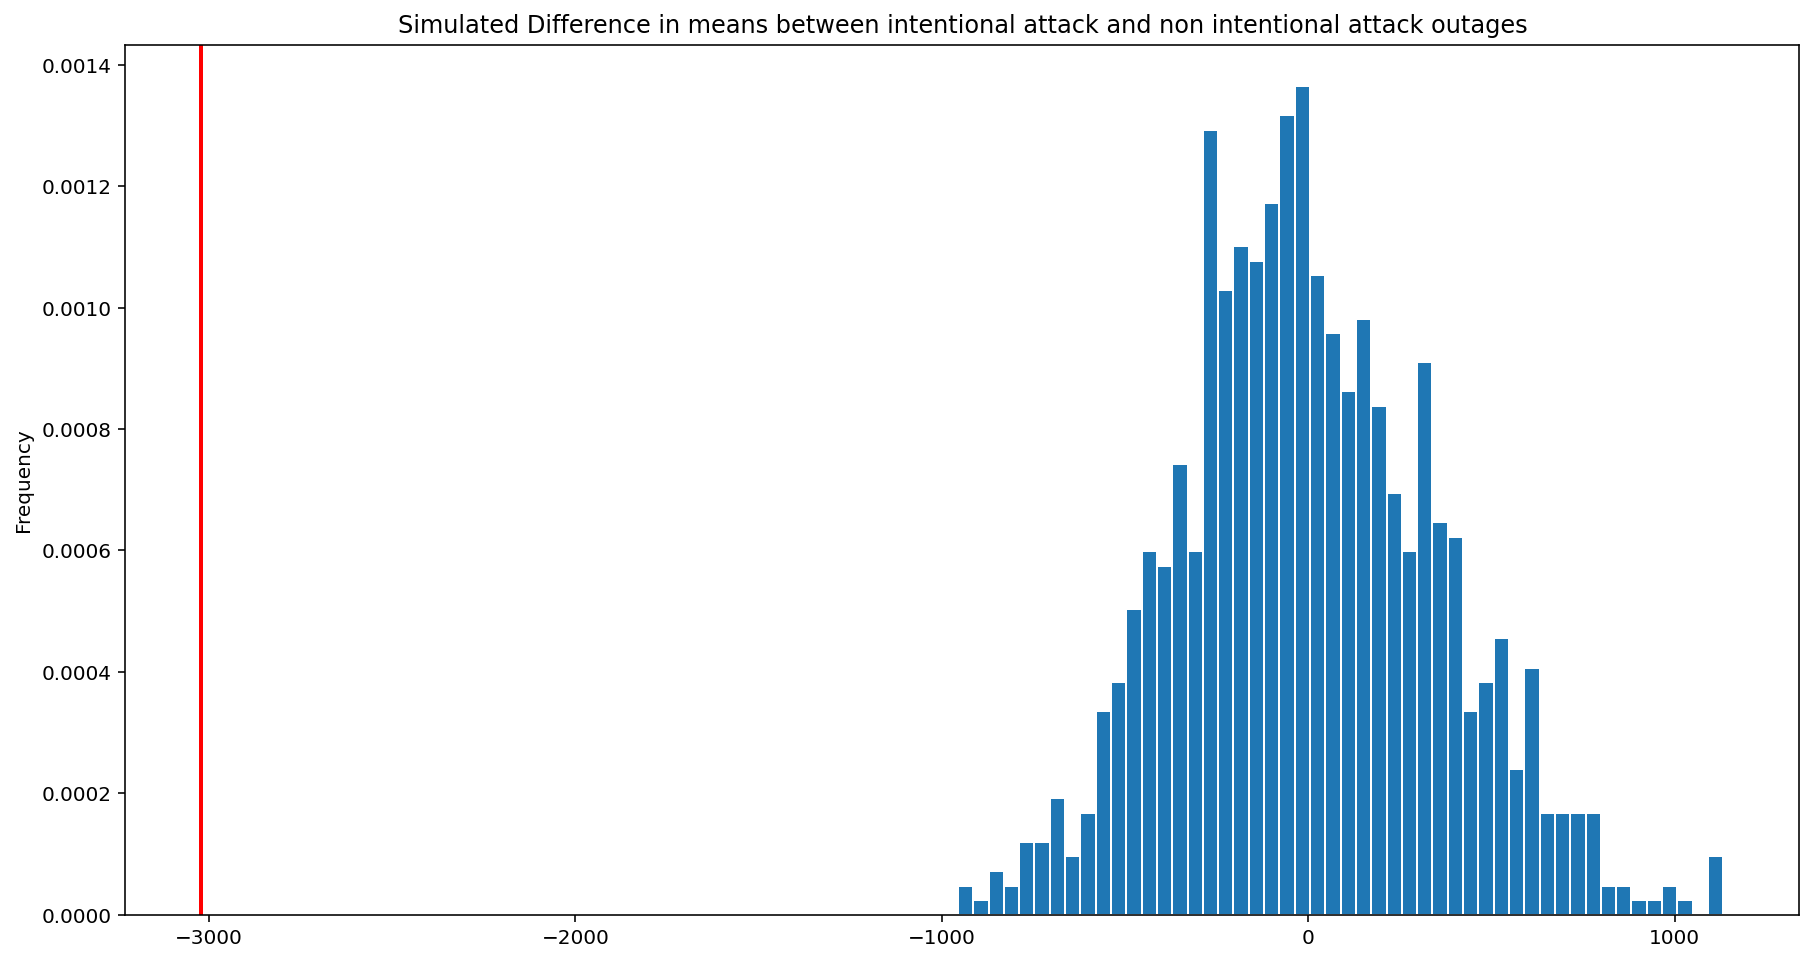

In [49]:
pd.Series(stats).plot(kind='hist', 
                     density=True,
                     ec='w',
                     title='Simulated Difference in means between intentional attack and non intentional attack outages',
                     bins=50, 
                     figsize = (15,8));
plt.axvline(x=obs, color='red', linewidth=2);

In [50]:
print((f"The resulting p-value of our permutation test is: {p}"))

The resulting p-value of our permutation test is: 0.0


As can be seen above, with a resulting p-value of 0.0, we reject the null at a signficance level of 0.05 in favor of the alternative hypothesis. It appears that Intentional attack outages result in shorter outage durations. According to this result, we can conclude that although they are a relatively common cause, outages caused by human tampering are not as devastating in terms of duration as other forms.

Addressing our second question is more challenging. In order to explore whether public appeal outages are **engineered**, we first need to consider what criteria would indicate human generated outages rather than natural ones. The clearest one would be the fact that if public appeal outages were indeed man-made, then there would be some sort of **uniformity** in terms of the outage duration. Since our aforementioned theory posits that these public appeal outages are in response to anticipated extreme weather and are conducted to maintain the integrity of the power grid, this process entails shutting off power only for certain sectors of the state. These sectors would be down for a **set** amount of time to ensure fair treatment of residents and to enable them to continue to live in comfort while maintaining the power grid. This means that, if this theory were true, then public appeal outages, regardless of their length, would have lower variance observed than that seen in other causes. 

With this in mind, we decided to answer this question by conducting a permutation test using the variance ratio as the test statistic of choice. If the variance of public appeal outage durations are similar to that of non public appeal outages, then we shouldn't see a low p-value. Otherwise, we are likely to get a significant result. Once again, using a significance level of 0.05:

    null: In the population, the variance for outage duration resulting from public appeal outages and the variance for outage duration resulting from other causes have the same distribution. The observed difference was due to random chance.

    alt: Public appeal outage durations have less variance as outage durations from other cause categories.

In [51]:
# null: outages caused by public appeal generally have same variance as other outages
# alt: outages caused by public appeal generally have lower variance than other outages
# PERMUTATION TEST
outage_duration_and_cause = outages_clean[['outage.duration', 'cause.category']].copy()
outage_duration_and_cause

# # TEST STATISTIC - VARIANCE
public_appeal_duration_var = (outage_duration_and_cause[(outage_duration_and_cause['cause.category']=='public appeal')]['outage.duration'].var())
rest_duration_var = (outage_duration_and_cause[~(outage_duration_and_cause['cause.category']=='public appeal')]['outage.duration'].var())
# p = stats <= obs
obs = public_appeal_duration_var / rest_duration_var
obs


stats = []

for _ in np.arange(1_000):
    outage_duration_and_cause['cause.category'] = (np.random.permutation(outage_duration_and_cause['cause.category']))
    # FIND STATISTIC
    temp_public_appeal_duration_var = (outage_duration_and_cause[(outage_duration_and_cause['cause.category']=='public appeal')]['outage.duration'].var())
    temp_rest_duration_var = (outage_duration_and_cause[~(outage_duration_and_cause['cause.category']=='public appeal')]['outage.duration'].var())
    temp_stat = temp_public_appeal_duration_var / temp_rest_duration_var 
    stats += [temp_stat]

p = (np.array(stats) <= obs).mean()

The resulting plot below displays the distribution of our permutation test's test statistics. The red line denotes our observed value.

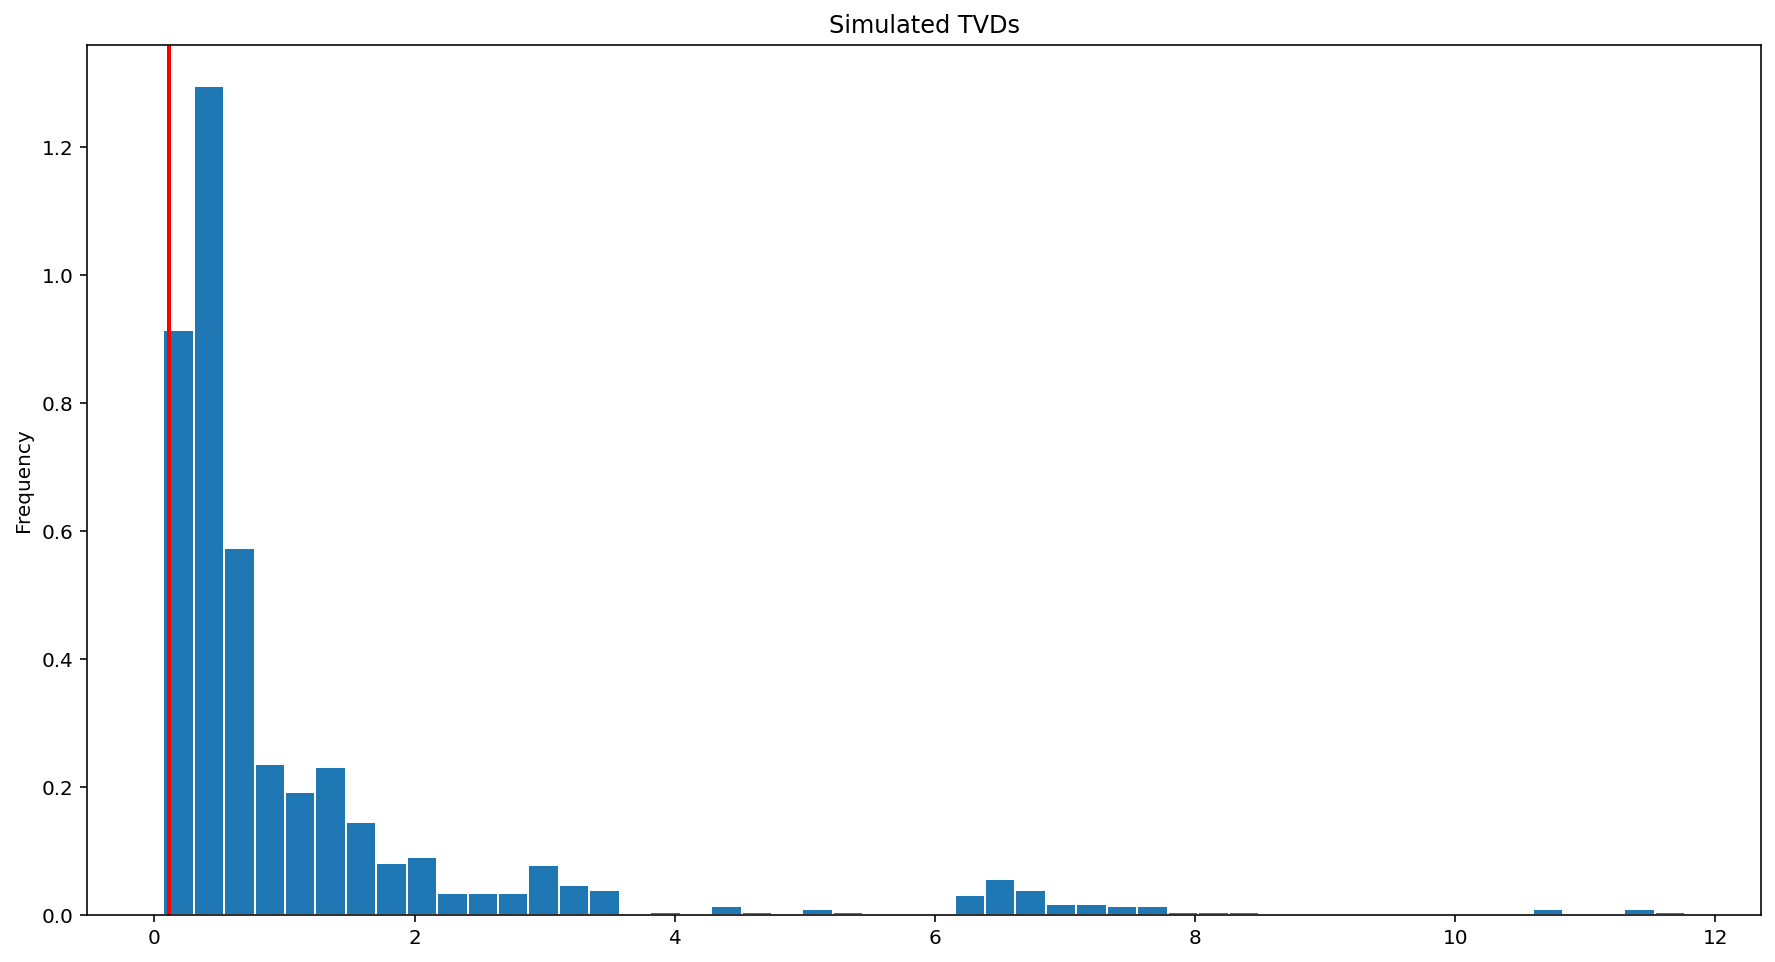

In [52]:
pd.Series(stats).plot(kind='hist', 
                     density=True,
                     ec='w',
                     title='Simulated TVDs',
                     bins=50,
                     figsize = (15,8));
plt.axvline(x=obs, color='red', linewidth=2);

In [53]:
print((f"The resulting p-value of our permutation test is: {p}"))

The resulting p-value of our permutation test is: 0.008


As can be seen above, with a resulting p-value of 0.006, we reject the null at a significance level of 0.05 in favor of the alternative hypothesis. It appears that public appeal outages have significantly less variance within their outage duration when compared to the outage duration resulting from other cause categories. This supports our theory that public appeal outages are indeed man-made, most likely a result of the practice of rotating outages.